## Prepare data

### Only consider remove outliers

Read all the data. Apply simple outlier removal by validity range.

In [1]:
from utility import read_all_test_data_from_path
import numpy as np
import pandas as pd


def remove_outliers(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges. 
    Define a valid range of temperature and voltage. 
    Use ffil function to replace the invalid measurement with the previous value.
    '''
    df['temperature'] = df['temperature'].where(df['temperature'] <= 100, np.nan)
    df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
    df['temperature'] = df['temperature'].ffill()

    df['voltage'] = df['voltage'].where(df['voltage'] >= 6000, np.nan)
    df['voltage'] = df['voltage'].where(df['voltage'] <= 9000, np.nan)
    df['voltage'] = df['voltage'].ffill()

    df['position'] = df['position'].where(df['position'] >= 0, np.nan)
    df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
    df['position'] = df['position'].ffill()


base_dictionary = '../../projects/maintenance_industry_4_2024/dataset/training_data/'
df_data = read_all_test_data_from_path(base_dictionary, remove_outliers, is_plot=False)

## Define experiment supporting function

### Training the model for all motors, using all the features.

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from utility import run_cross_val

def run_all_motors(df_data, mdl, window_size=0, single_run_result=True, mdl_type='reg'):
    all_results = []
    # Loop over all the six motors.
    for i in range(1, 7):
        # Get the name of the response variable.
        y_name = f'data_motor_{i}_label'
    
        # Seperate features and the response variable.
        # Remove the irrelavent features.
        df_x = df_data.drop(columns=[y_name])
        # Get y.
        y = df_data.loc[:, y_name]

        print(f'Model for predicting the label of motor {i}:')
        # Run cross validation.
        df_perf = run_cross_val(mdl, df_x, y, window_size=window_size, single_run_result=single_run_result, mdl_type=mdl_type)
        # Print the mean performance.
        print(df_perf.mean())
        print('\n')

        all_results.append(df_perf)

    return all_results

## Logistic regression

In [3]:
# We pick five tests with label 1.
df_data = df_data[df_data['test_condition'].isin(['20240325_155003', '20240425_093699', '20240425_094425', '20240426_140055', '20240426_141190'])]

### Window size = 0

Model for predicting the label of motor 1:

 New cv run:

Training performance, accuracy is: 0.9298188874514877
Training performance, precision is: 0.20588235294117646
Training performance, recall: 0.9824561403508771
Training performance, F1: 0.3404255319148936


Prediction performance, accuracy is: 0.8057726999398677
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


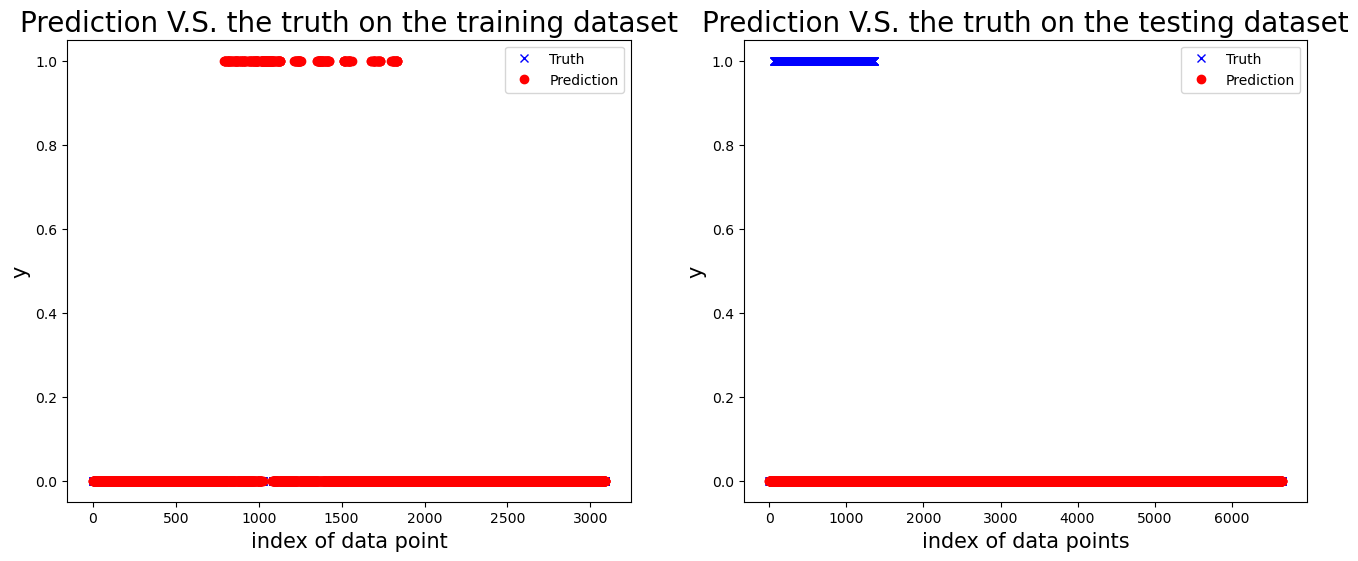


 New cv run:

Training performance, accuracy is: 0.9833911489540629
Training performance, precision is: 0.9064846416382253
Training performance, recall: 0.9844329132690882
Training performance, F1: 0.9438521677327648


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


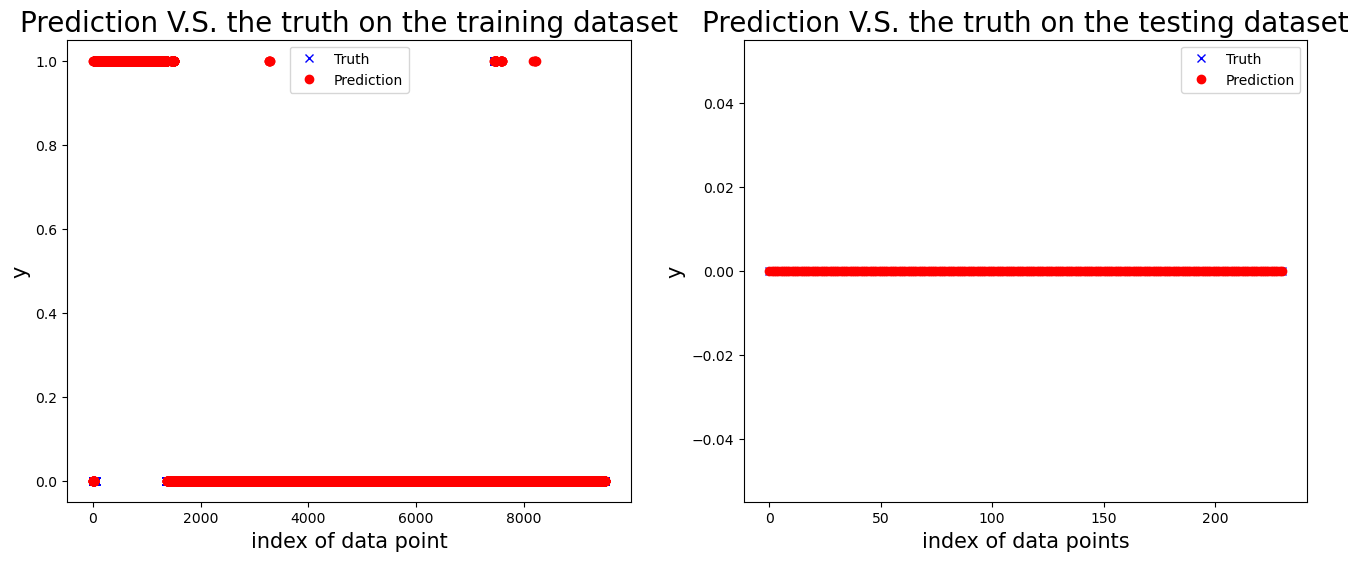


 New cv run:

Training performance, accuracy is: 0.9834494773519163
Training performance, precision is: 0.910212474297464
Training performance, recall: 0.9844329132690882
Training performance, F1: 0.9458689458689458


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


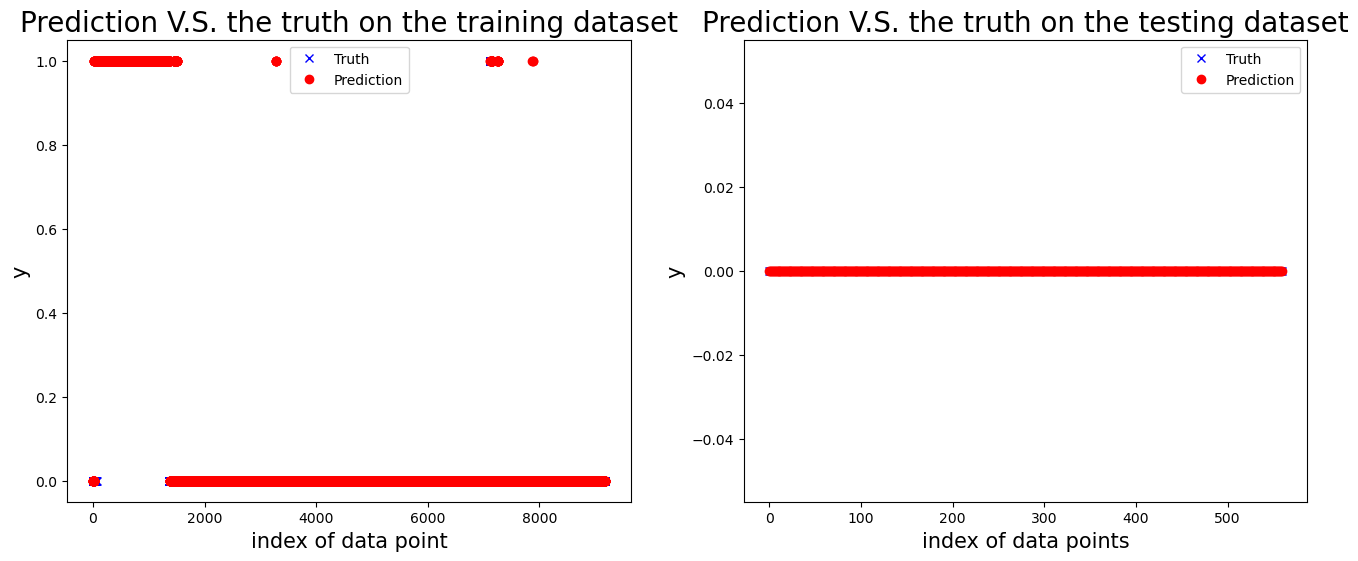


 New cv run:

Training performance, accuracy is: 0.9901149425287357
Training performance, precision is: 0.9375907111756169
Training performance, recall: 1.0
Training performance, F1: 0.9677902621722847


Prediction performance, accuracy is: 0.9195402298850575
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


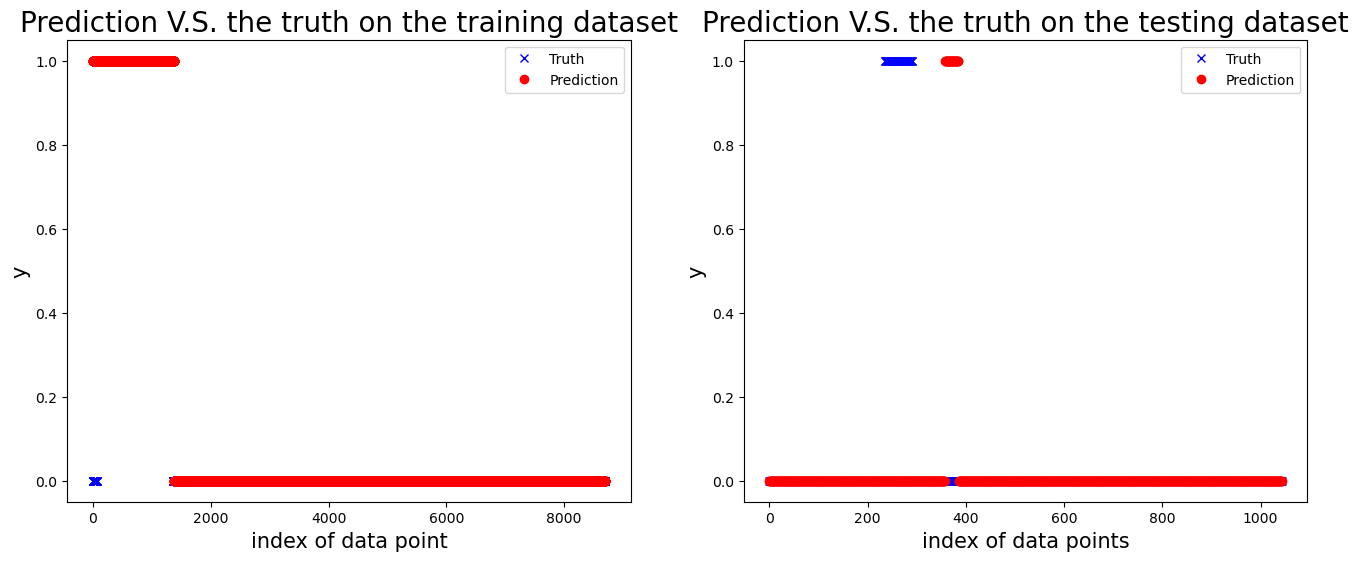


 New cv run:

Training performance, accuracy is: 0.9839754919288324
Training performance, precision is: 0.9208882720333103
Training performance, recall: 0.9836916234247591
Training performance, F1: 0.9512544802867384


Prediction performance, accuracy is: 0.7223548130469372
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


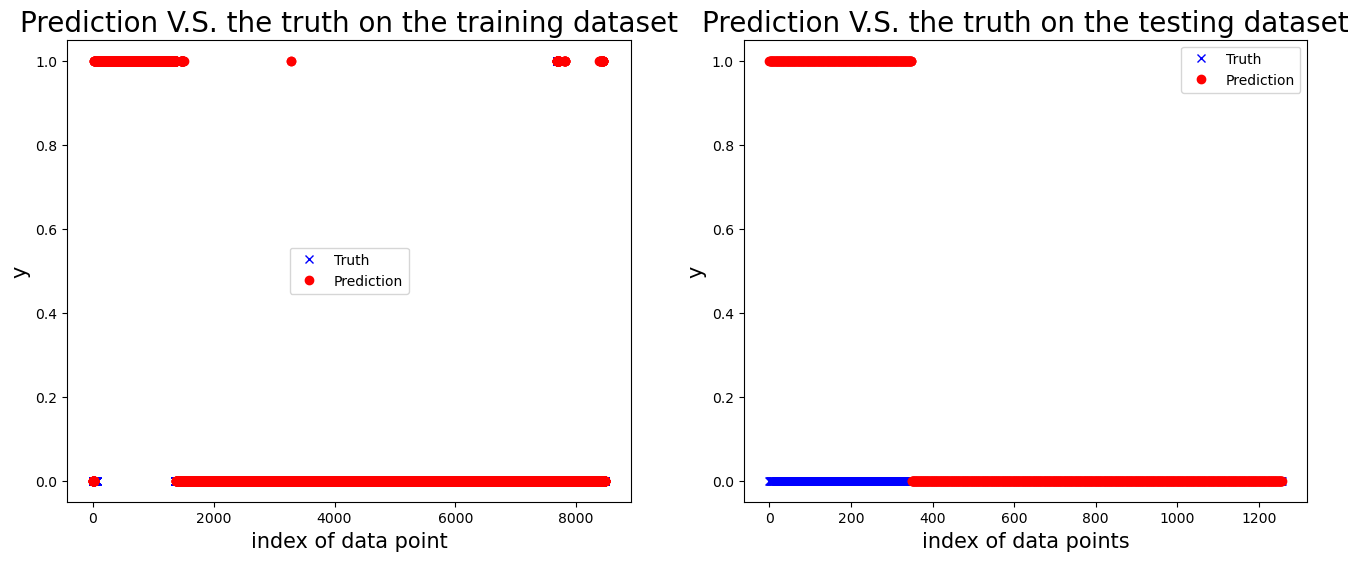

Accuracy     0.889534
Precision    0.400000
Recall       0.400000
F1 score     0.400000
dtype: float64


Model for predicting the label of motor 2:

 New cv run:

Training performance, accuracy is: 0.9527813712807245
Training performance, precision is: 0.3486238532110092
Training performance, recall: 0.95
Training performance, F1: 0.5100671140939598


Prediction performance, accuracy is: 0.007065544197233915
Prediction performance, precision is: 1.0
Prediction performance, recall is：0.007065544197233915
Prediction performance, F1 is：0.014031945066427827


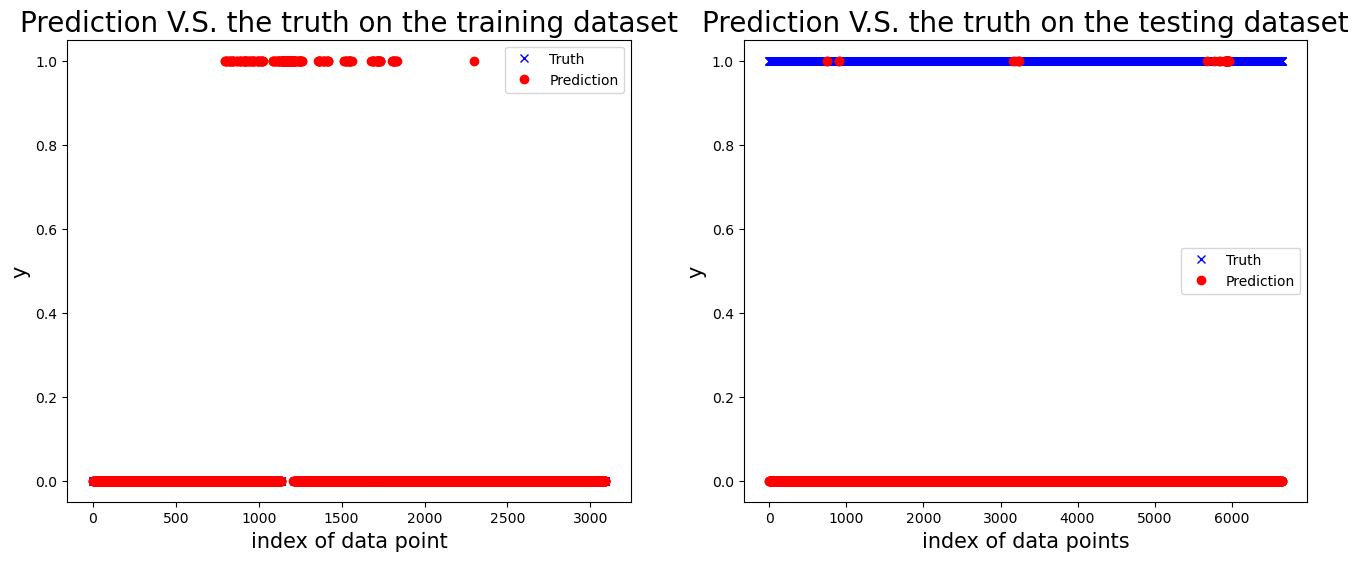


 New cv run:

Training performance, accuracy is: 0.9966361820666456
Training performance, precision is: 1.0
Training performance, recall: 0.9952465834818776
Training performance, F1: 0.9976176295413937


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


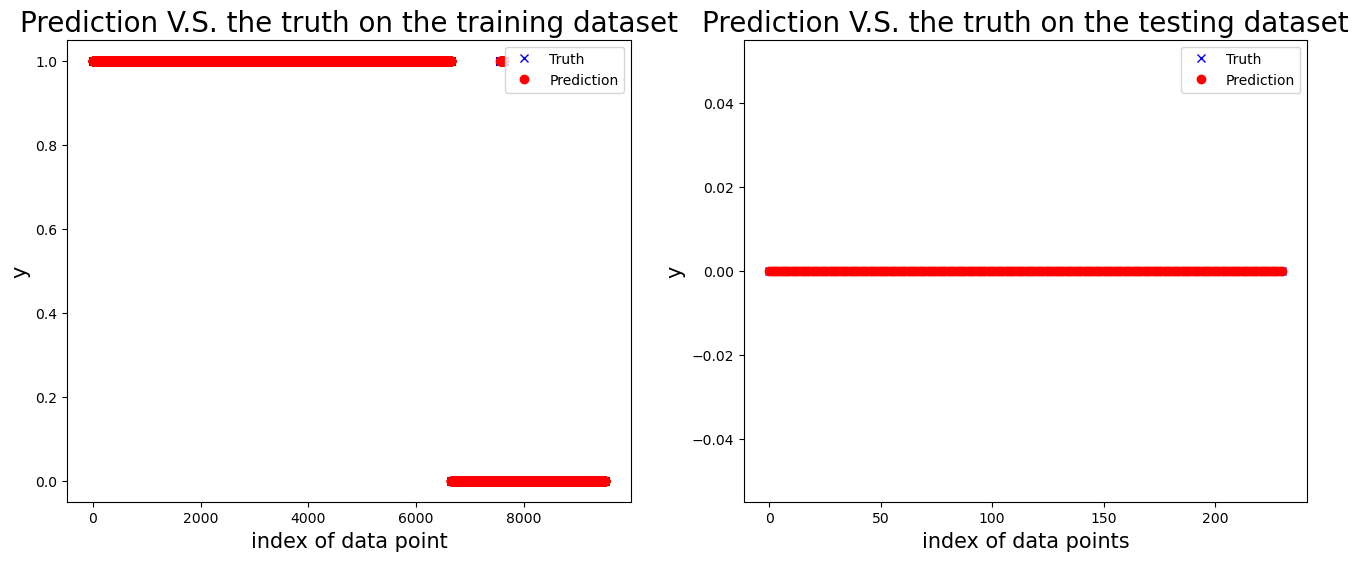


 New cv run:

Training performance, accuracy is: 0.9965156794425087
Training performance, precision is: 1.0
Training performance, recall: 0.9952465834818776
Training performance, F1: 0.9976176295413937


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


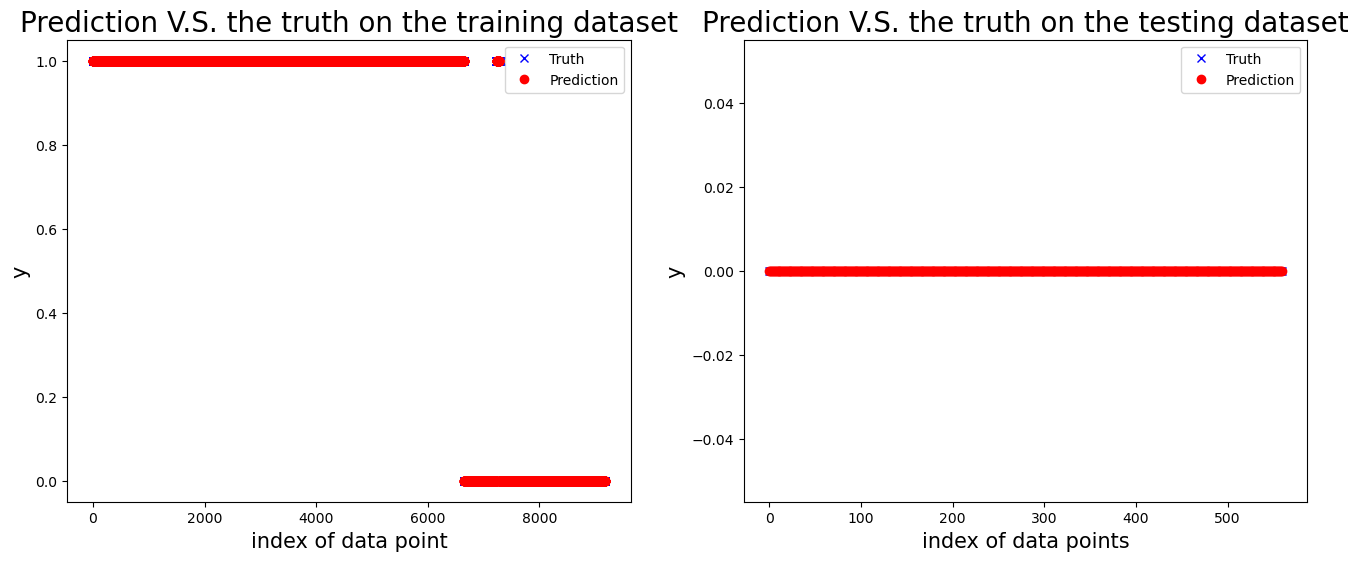


 New cv run:

Training performance, accuracy is: 1.0
Training performance, precision is: 1.0
Training performance, recall: 1.0
Training performance, F1: 1.0


Prediction performance, accuracy is: 0.9233716475095786
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


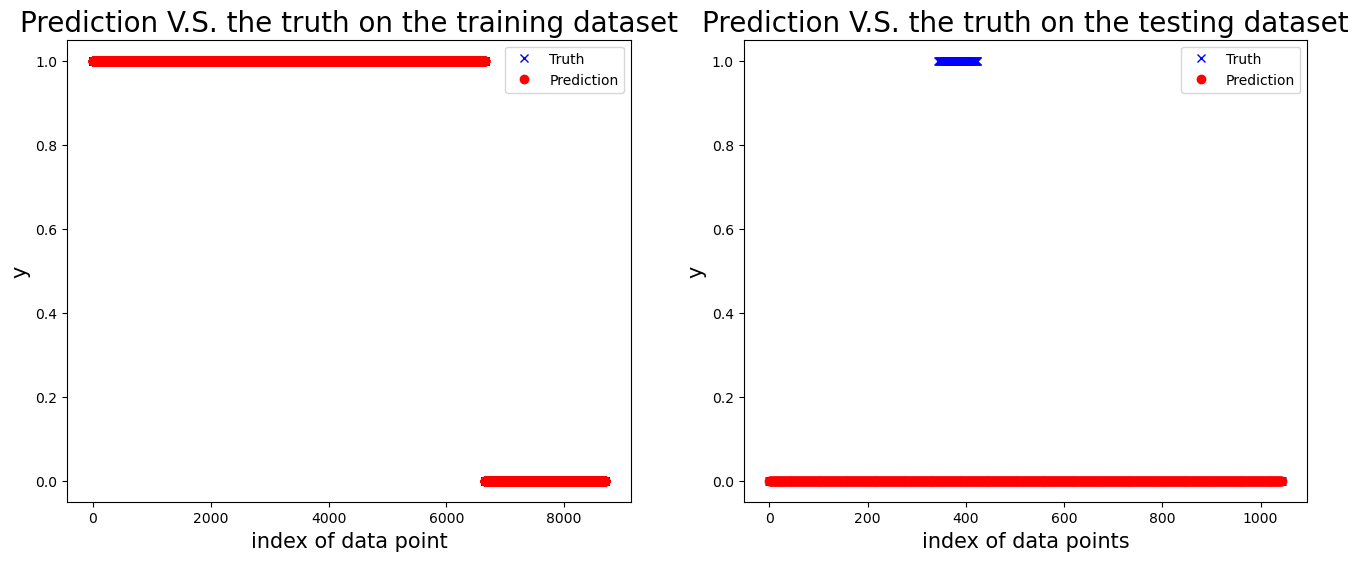


 New cv run:

Training performance, accuracy is: 0.9962295275126665
Training performance, precision is: 1.0
Training performance, recall: 0.9952465834818776
Training performance, F1: 0.9976176295413937


Prediction performance, accuracy is: 0.02784407319013524
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


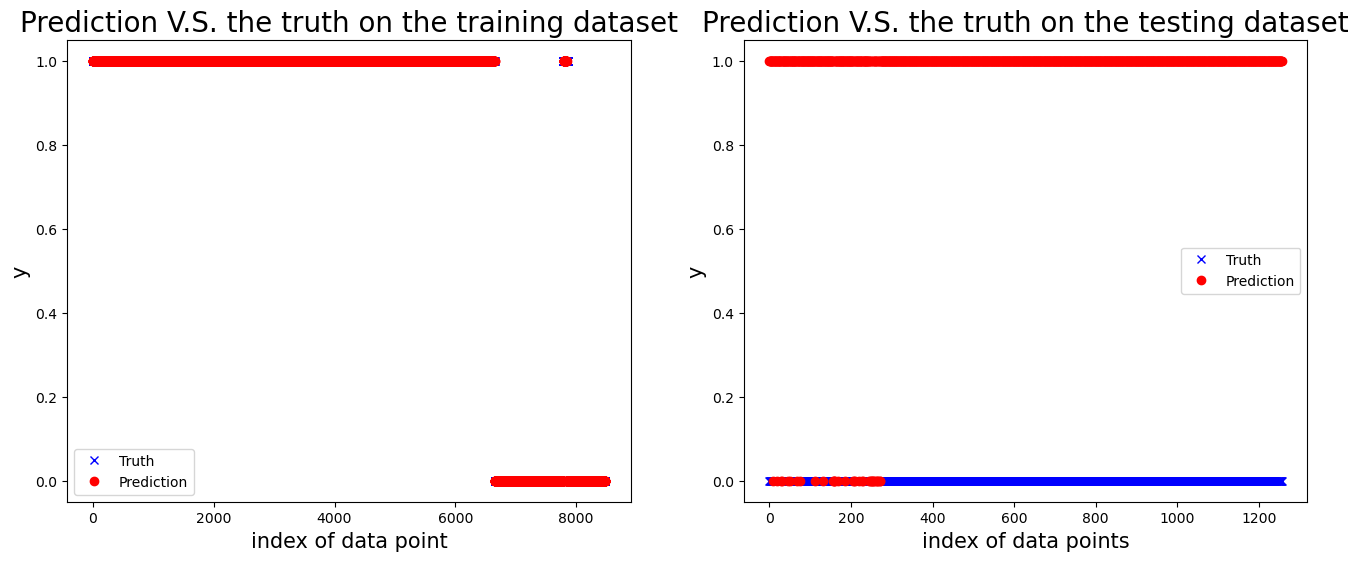

Accuracy     0.591656
Precision    0.600000
Recall       0.401413
F1 score     0.402806
dtype: float64


Model for predicting the label of motor 3:

 New cv run:

Training performance, accuracy is: 0.8350582147477361
Training performance, precision is: 0.13874788494077833
Training performance, recall: 0.9879518072289156
Training performance, F1: 0.2433234421364985


Prediction performance, accuracy is: 0.5989176187612748
Prediction performance, precision is: 0.009715994020926755
Prediction performance, recall is：0.5909090909090909
Prediction performance, F1 is：0.019117647058823527


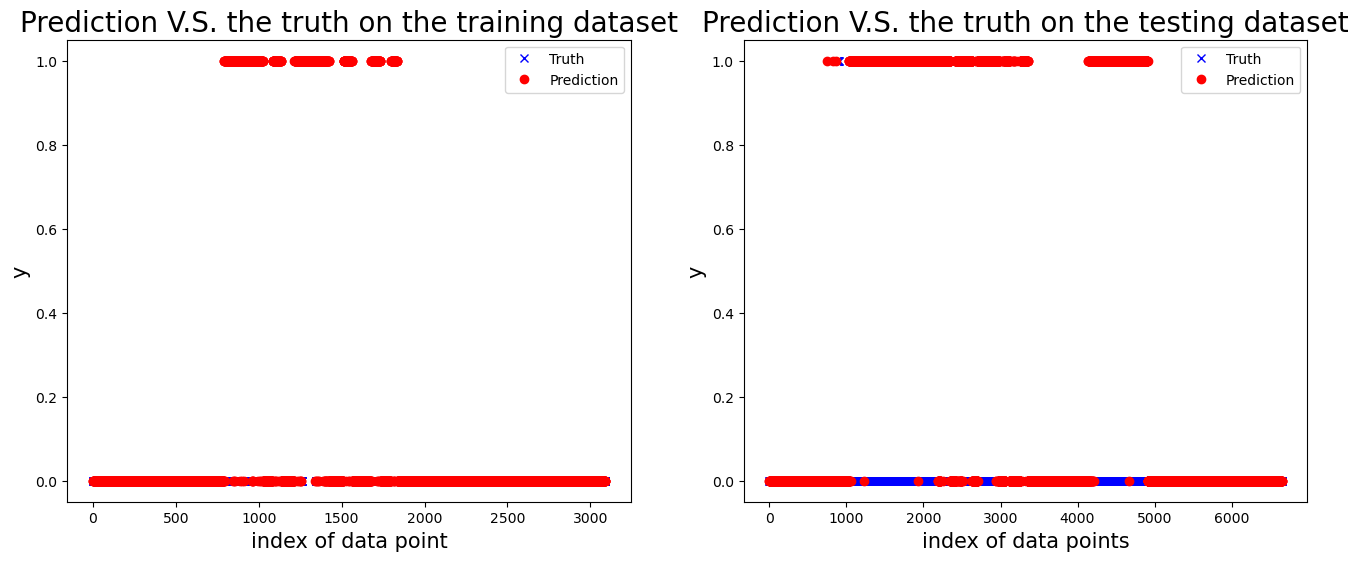


 New cv run:

Training performance, accuracy is: 0.9224219489120151
Training performance, precision is: 0.14682080924855492
Training performance, recall: 1.0
Training performance, F1: 0.2560483870967742


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


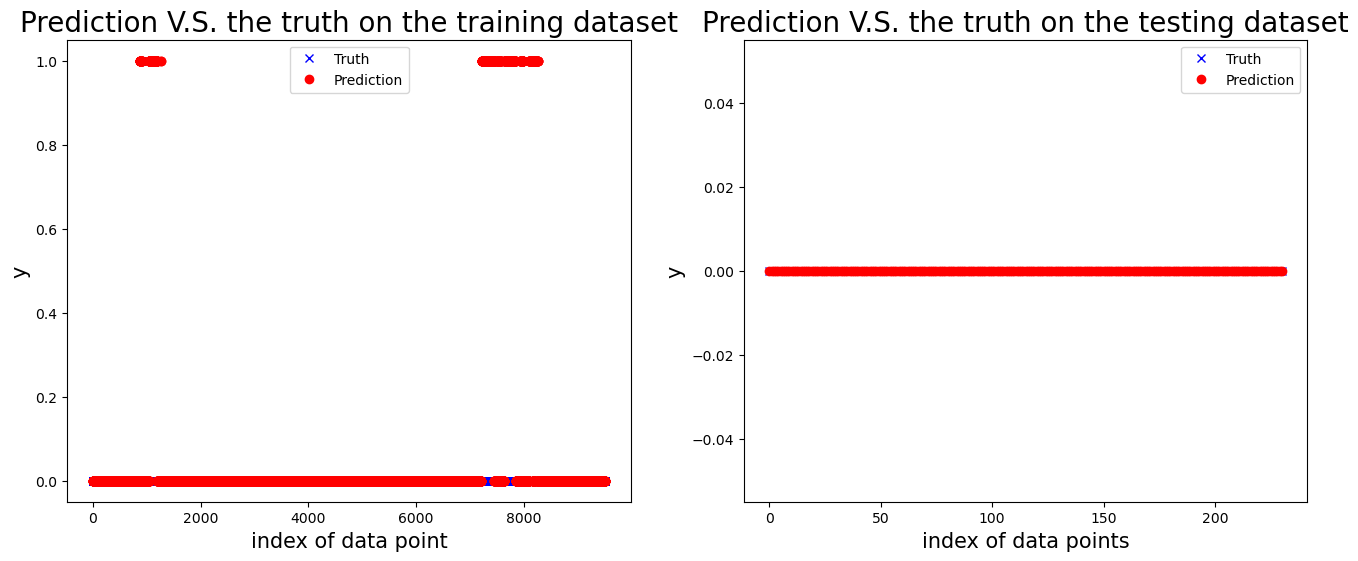


 New cv run:

Training performance, accuracy is: 0.9204050522648084
Training performance, precision is: 0.14801864801864803
Training performance, recall: 1.0
Training performance, F1: 0.2578680203045685


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


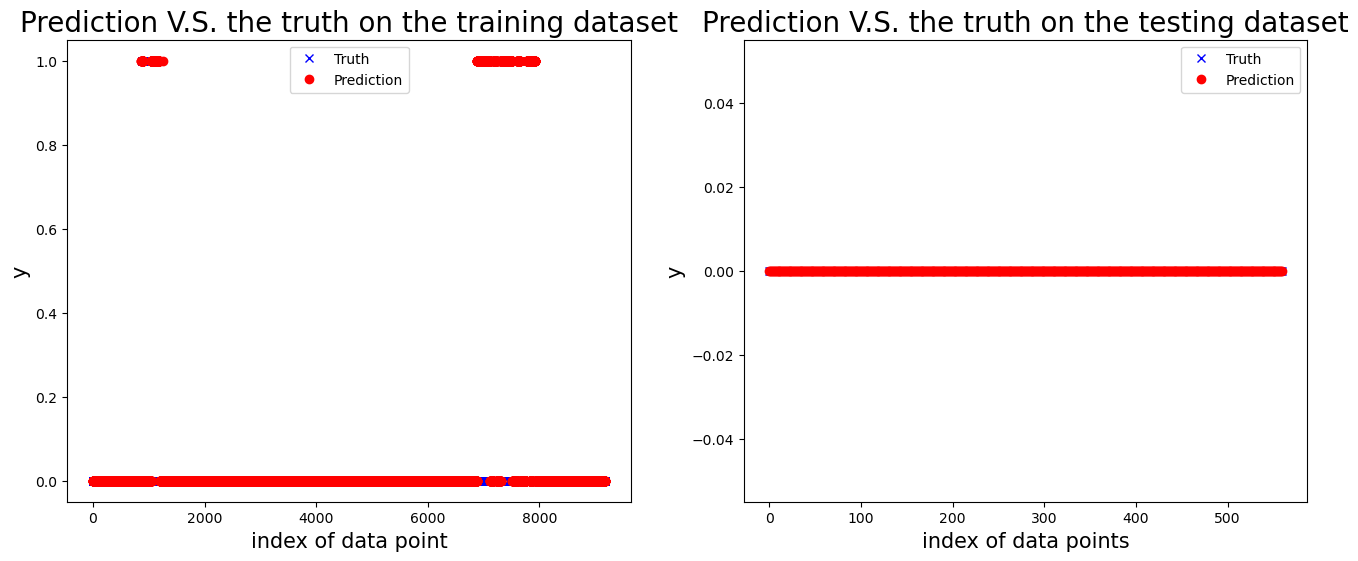


 New cv run:

Training performance, accuracy is: 0.9842528735632184
Training performance, precision is: 0.2430939226519337
Training performance, recall: 1.0
Training performance, F1: 0.3911111111111111


Prediction performance, accuracy is: 0.7030651340996169
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


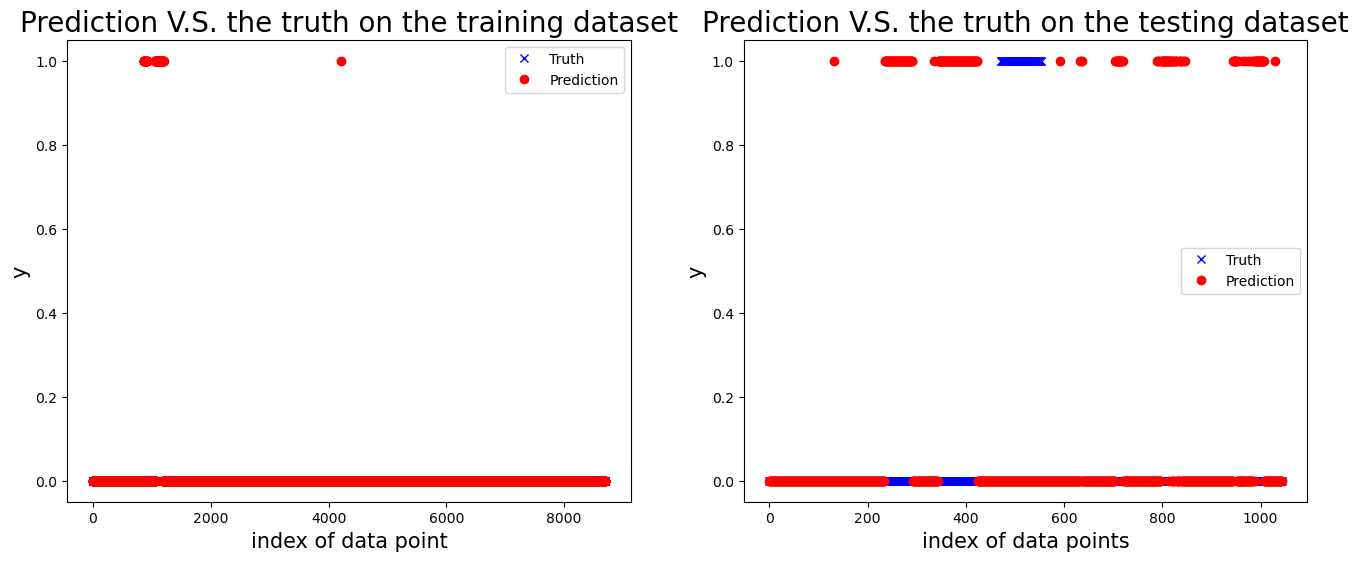


 New cv run:

Training performance, accuracy is: 0.9136326145870154
Training performance, precision is: 0.14767441860465116
Training performance, recall: 1.0
Training performance, F1: 0.2573454913880446


Prediction performance, accuracy is: 0.9252187748607796
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


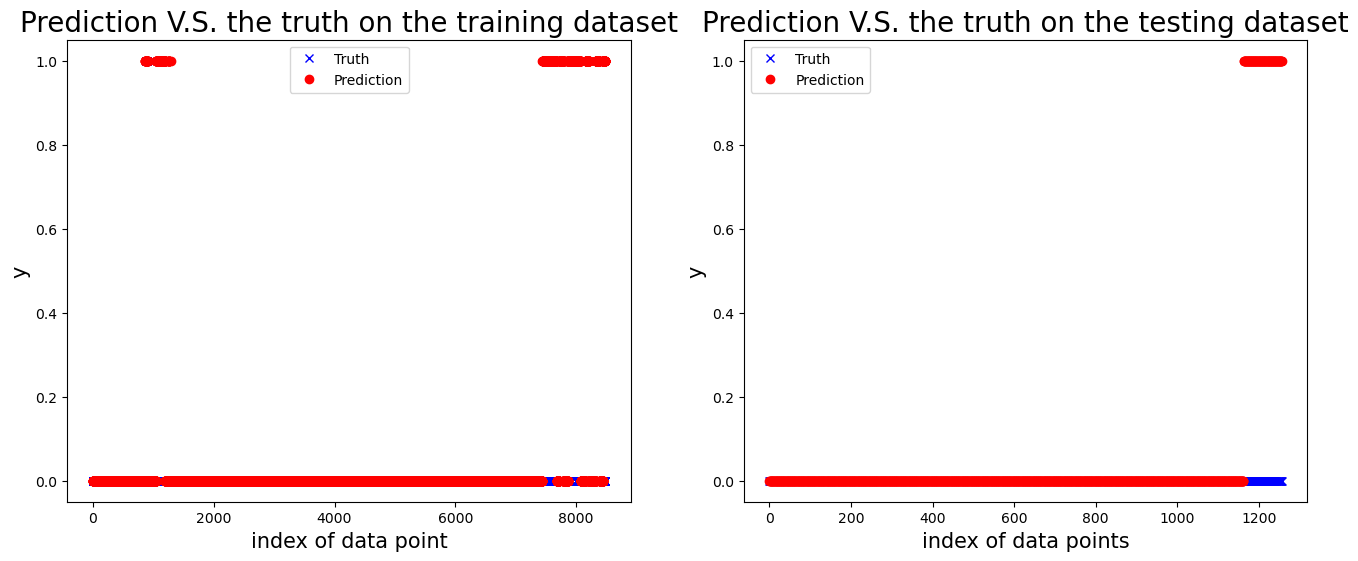

Accuracy     0.845440
Precision    0.401943
Recall       0.518182
F1 score     0.403824
dtype: float64


Model for predicting the label of motor 4:

 New cv run:

Training performance, accuracy is: 0.916882276843467
Training performance, precision is: 0.2485207100591716
Training performance, recall: 0.9655172413793104
Training performance, F1: 0.3952941176470588


Prediction performance, accuracy is: 0.5162357185808779
Prediction performance, precision is: 1.0
Prediction performance, recall is：0.5162357185808779
Prediction performance, F1 is：0.6809438826095577


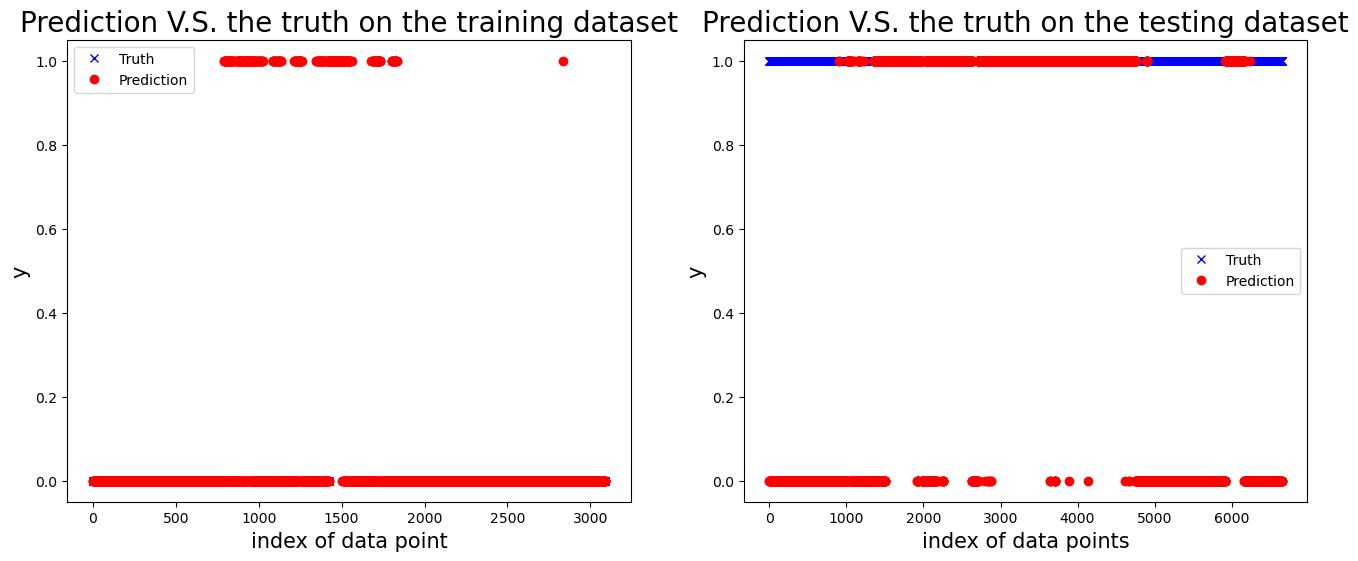


 New cv run:

Training performance, accuracy is: 0.9956901082728897
Training performance, precision is: 1.0
Training performance, recall: 0.9939160112776376
Training performance, F1: 0.996948723673439


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


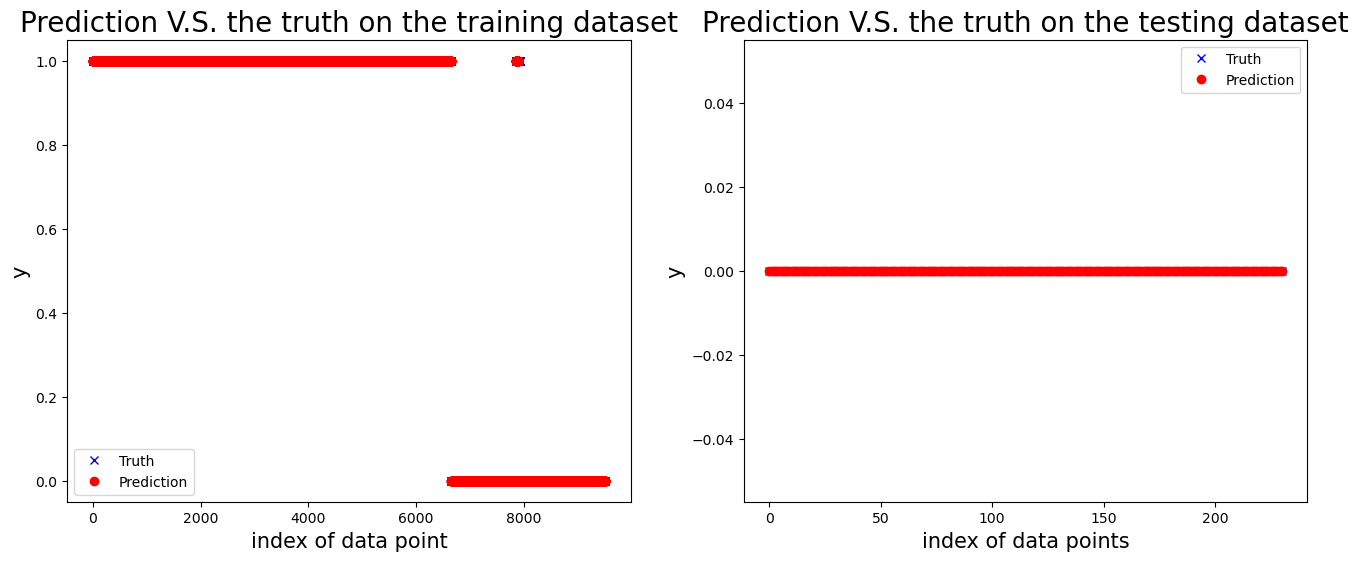


 New cv run:

Training performance, accuracy is: 0.9955357142857143
Training performance, precision is: 1.0
Training performance, recall: 0.9939160112776376
Training performance, F1: 0.996948723673439


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


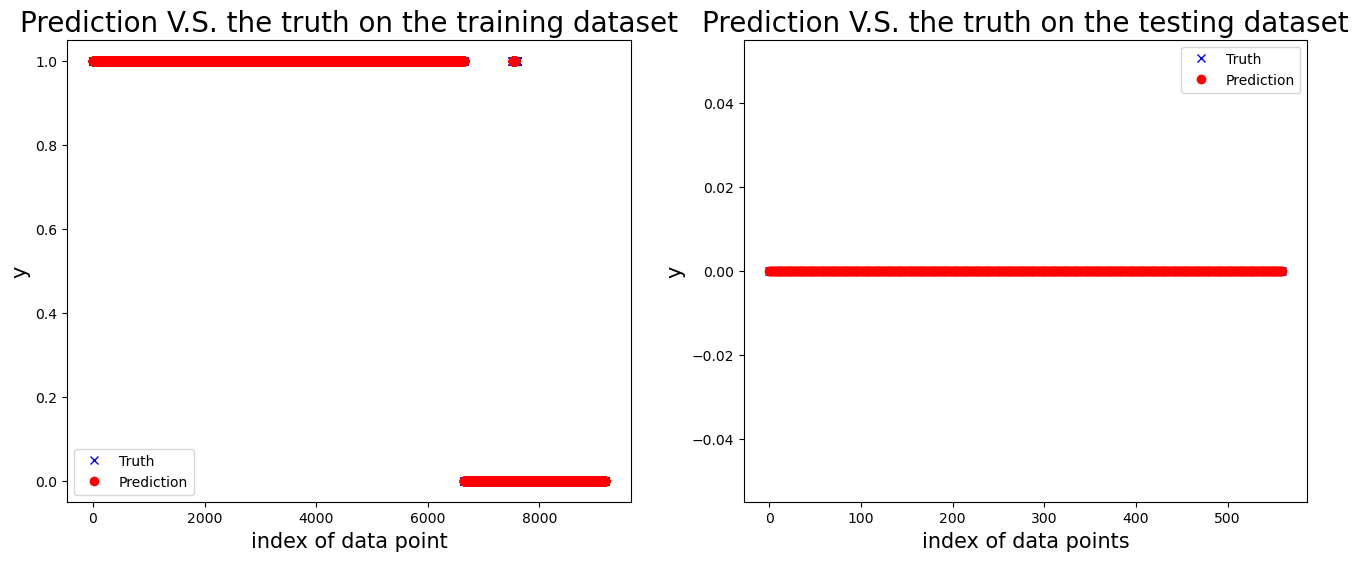


 New cv run:

Training performance, accuracy is: 1.0
Training performance, precision is: 1.0
Training performance, recall: 1.0
Training performance, F1: 1.0


Prediction performance, accuracy is: 0.9166666666666666
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


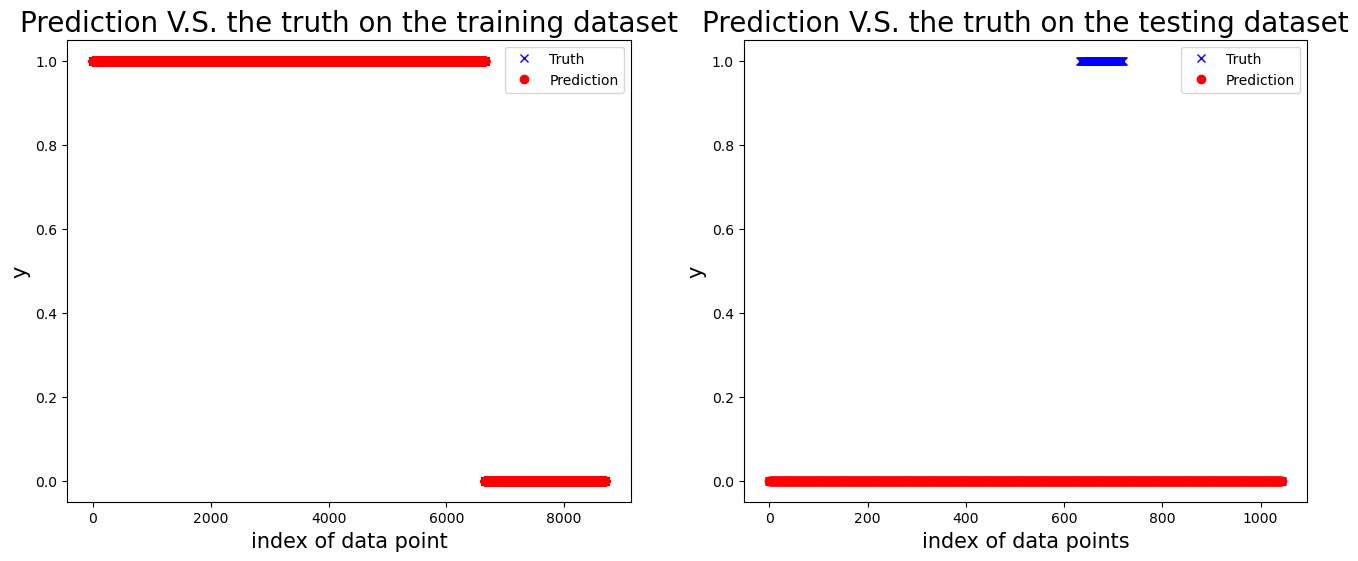


 New cv run:

Training performance, accuracy is: 0.9949334275951455
Training performance, precision is: 1.0
Training performance, recall: 0.9936192313399614
Training performance, F1: 0.9967994045403796


Prediction performance, accuracy is: 0.35083532219570407
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


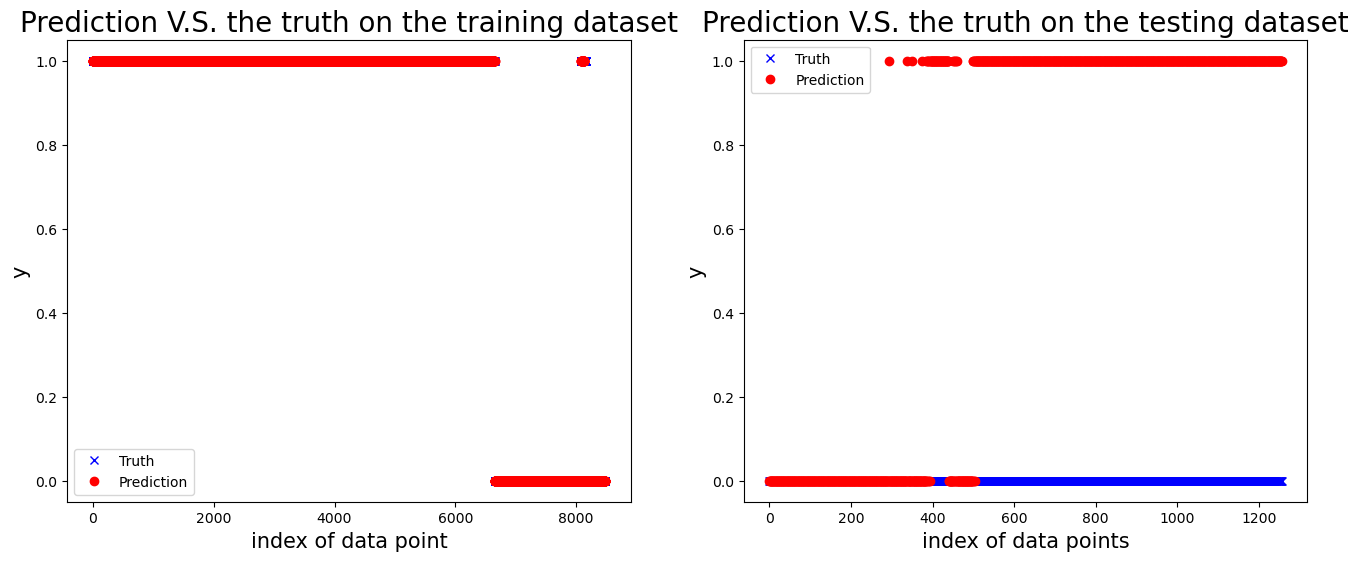

Accuracy     0.756748
Precision    0.600000
Recall       0.503247
F1 score     0.536189
dtype: float64


Model for predicting the label of motor 5:

 New cv run:

Training performance, accuracy is: 0.9275549805950841
Training performance, precision is: 0.3312883435582822
Training performance, recall: 0.9473684210526315
Training performance, F1: 0.49090909090909085


Prediction performance, accuracy is: 0.9788033674082982
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


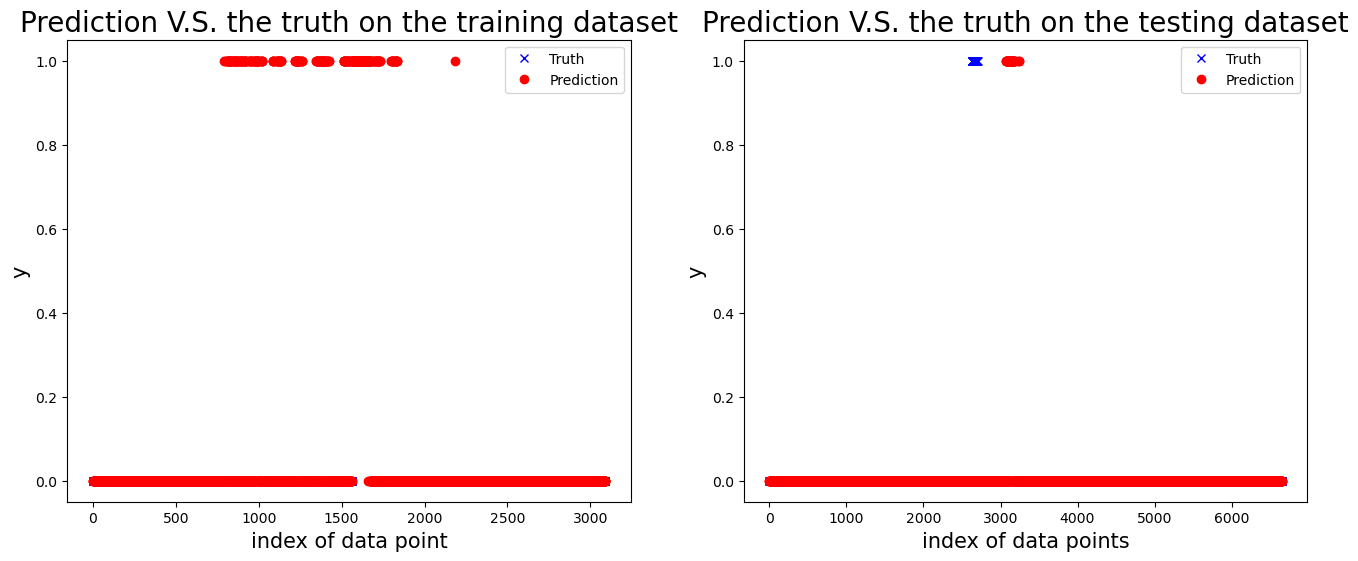


 New cv run:

Training performance, accuracy is: 0.9252601702932829
Training performance, precision is: 0.20558659217877095
Training performance, recall: 1.0
Training performance, F1: 0.3410565338276182


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


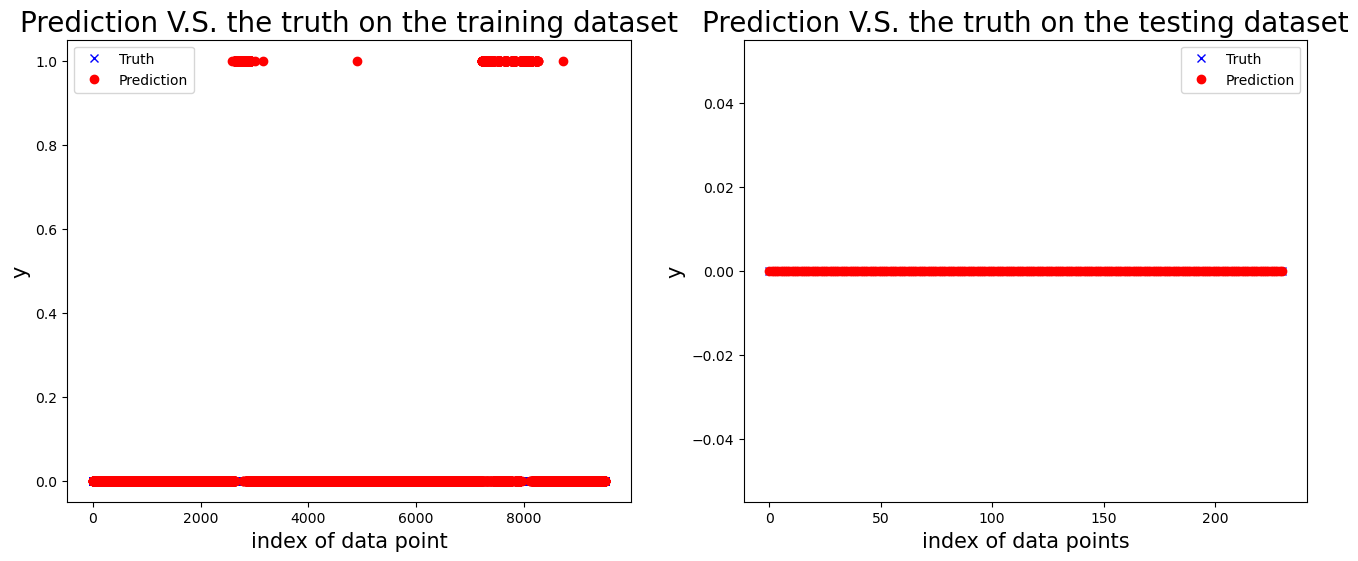


 New cv run:

Training performance, accuracy is: 0.9233449477351916
Training performance, precision is: 0.2072072072072072
Training performance, recall: 1.0
Training performance, F1: 0.3432835820895522


Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 1.0
Prediction performance, recall is：1.0
Prediction performance, F1 is：1.0


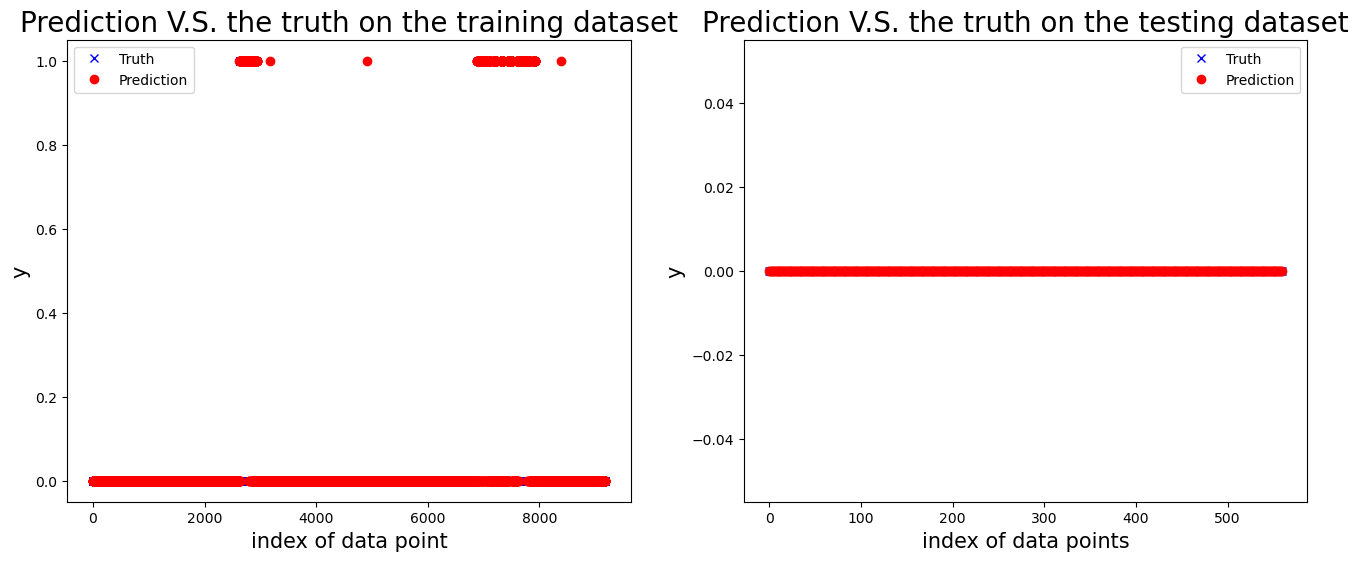


 New cv run:

Training performance, accuracy is: 0.9806896551724138
Training performance, precision is: 0.29411764705882354
Training performance, recall: 1.0
Training performance, F1: 0.45454545454545453


Prediction performance, accuracy is: 0.8908045977011494
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


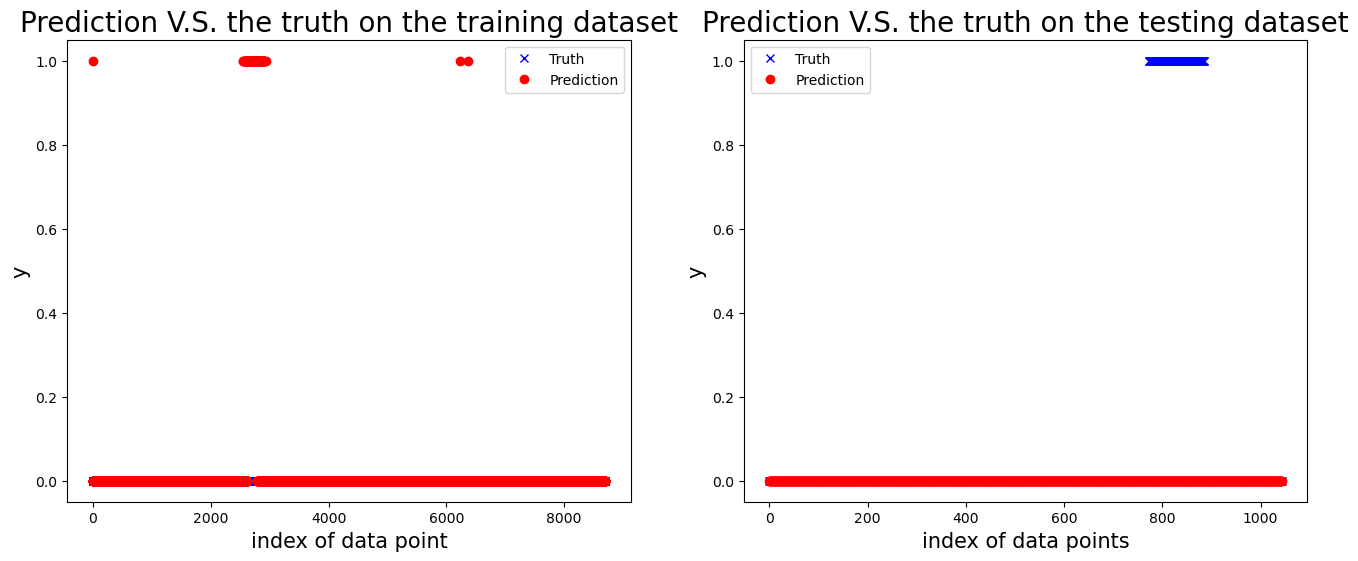


 New cv run:

Training performance, accuracy is: 0.9211735595616826
Training performance, precision is: 0.21570926143024619
Training performance, recall: 1.0
Training performance, F1: 0.3548698167791707


Prediction performance, accuracy is: 0.0007955449482895784
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


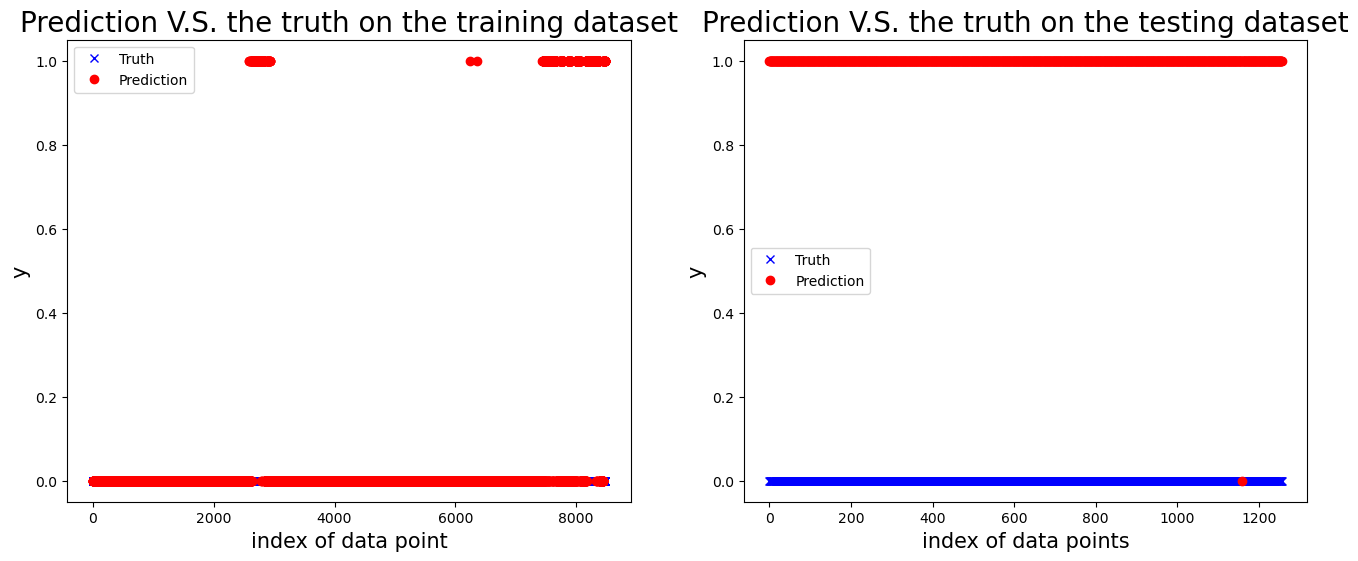

Accuracy     0.774081
Precision    0.400000
Recall       0.400000
F1 score     0.400000
dtype: float64


Model for predicting the label of motor 6:

 New cv run:

Training performance, accuracy is: 0.8897153945666235
Training performance, precision is: 0.4364326375711575
Training performance, recall: 0.8394160583941606
Training performance, F1: 0.5742821473158551


Prediction performance, accuracy is: 0.8976247745039087
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


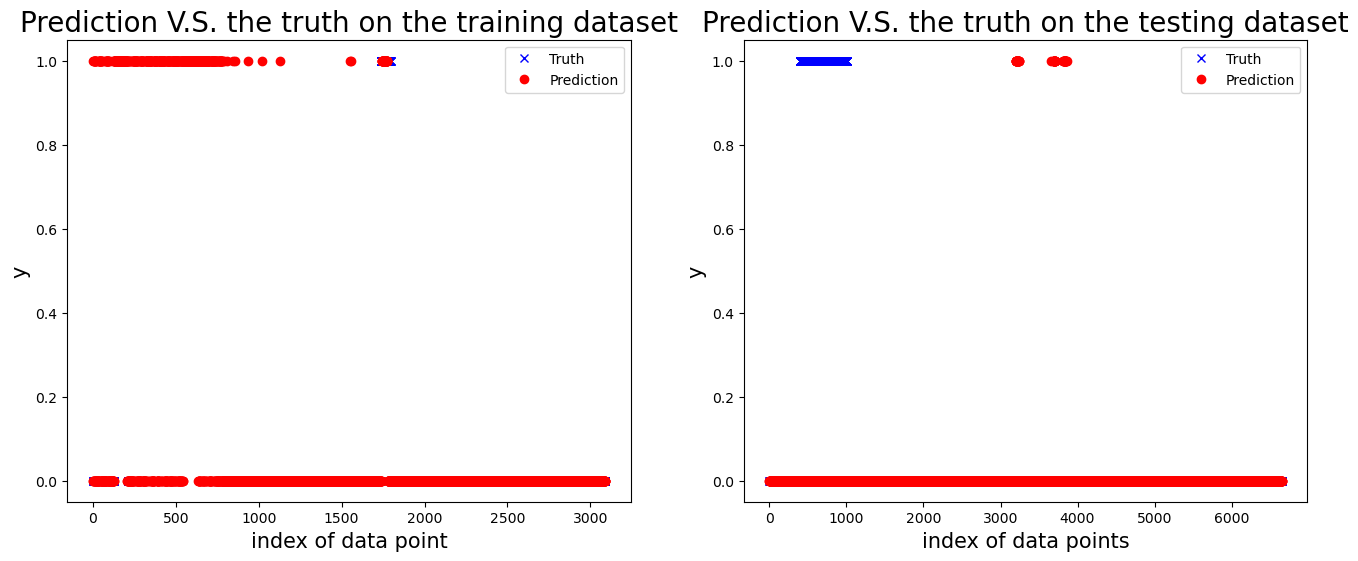


 New cv run:

Training performance, accuracy is: 0.9387154420267003
Training performance, precision is: 0.5852017937219731
Training performance, recall: 0.9654747225647349
Training performance, F1: 0.7287110283852954


Prediction performance, accuracy is: 0.354978354978355
Prediction performance, precision is: 0.354978354978355
Prediction performance, recall is：1.0
Prediction performance, F1 is：0.5239616613418531


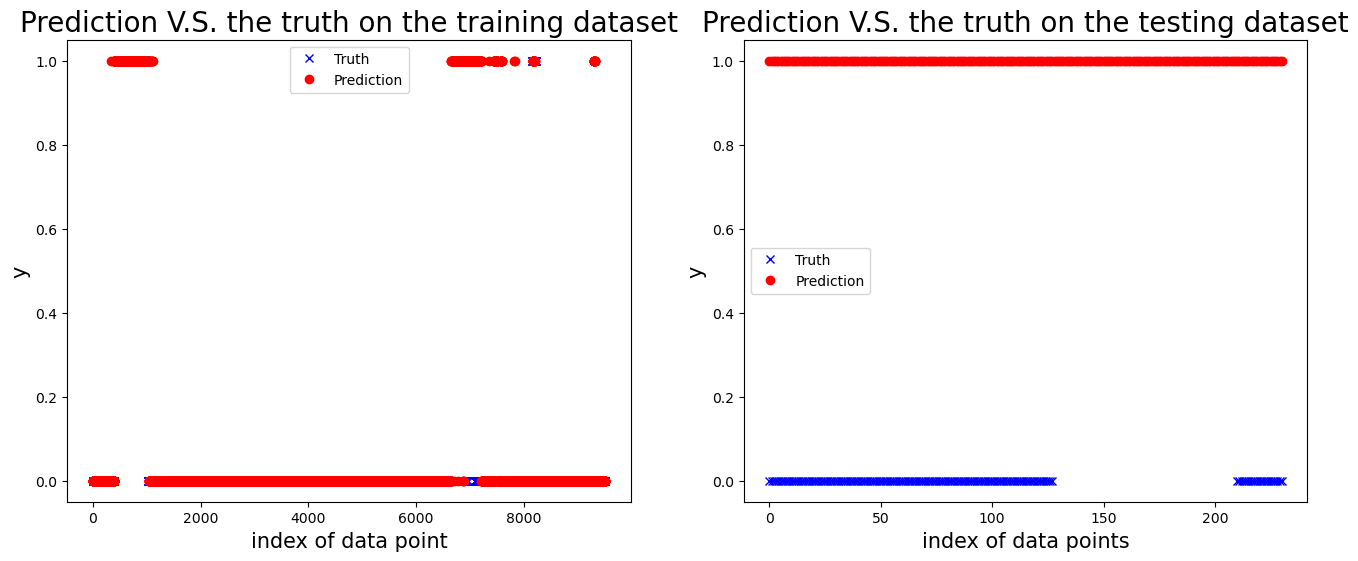


 New cv run:

Training performance, accuracy is: 0.9701655052264808
Training performance, precision is: 0.7494908350305499
Training performance, recall: 0.9633507853403142
Training performance, F1: 0.8430698739977092


Prediction performance, accuracy is: 0.9178571428571428
Prediction performance, precision is: 1.0
Prediction performance, recall is：0.6434108527131783
Prediction performance, F1 is：0.7830188679245284


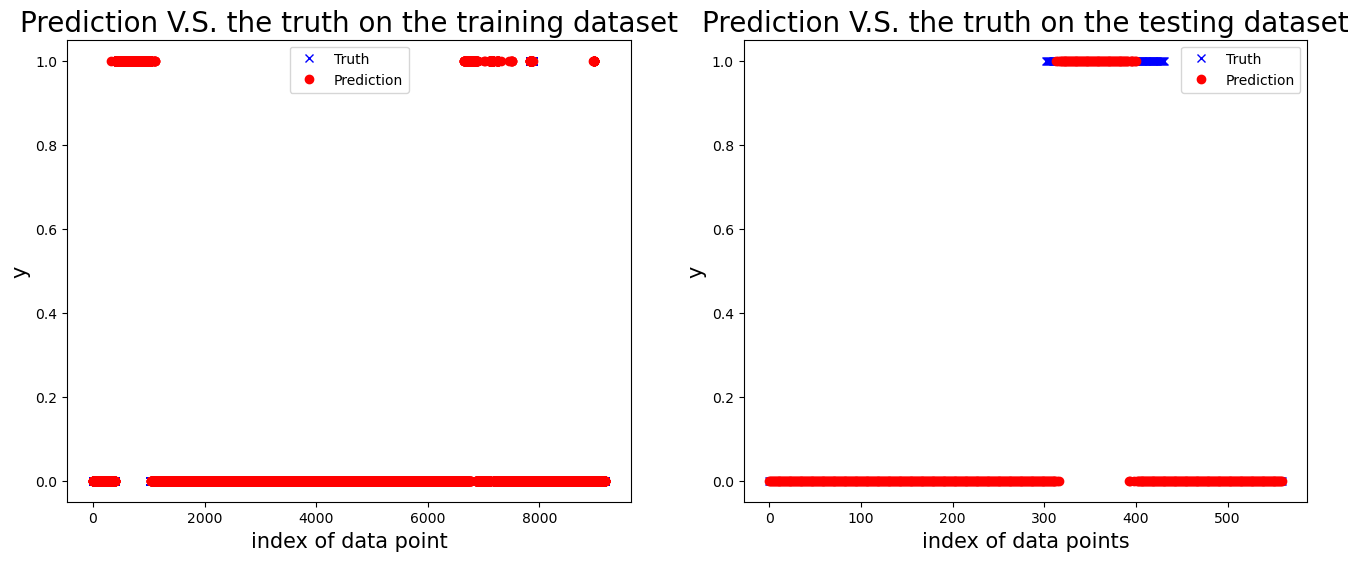


 New cv run:

Training performance, accuracy is: 0.953103448275862
Training performance, precision is: 0.6749585406301825
Training performance, recall: 0.980722891566265
Training performance, F1: 0.7996070726915521


Prediction performance, accuracy is: 0.22030651340996169
Prediction performance, precision is: 0.07183580387685291
Prediction performance, recall is：1.0
Prediction performance, F1 is：0.13404255319148936


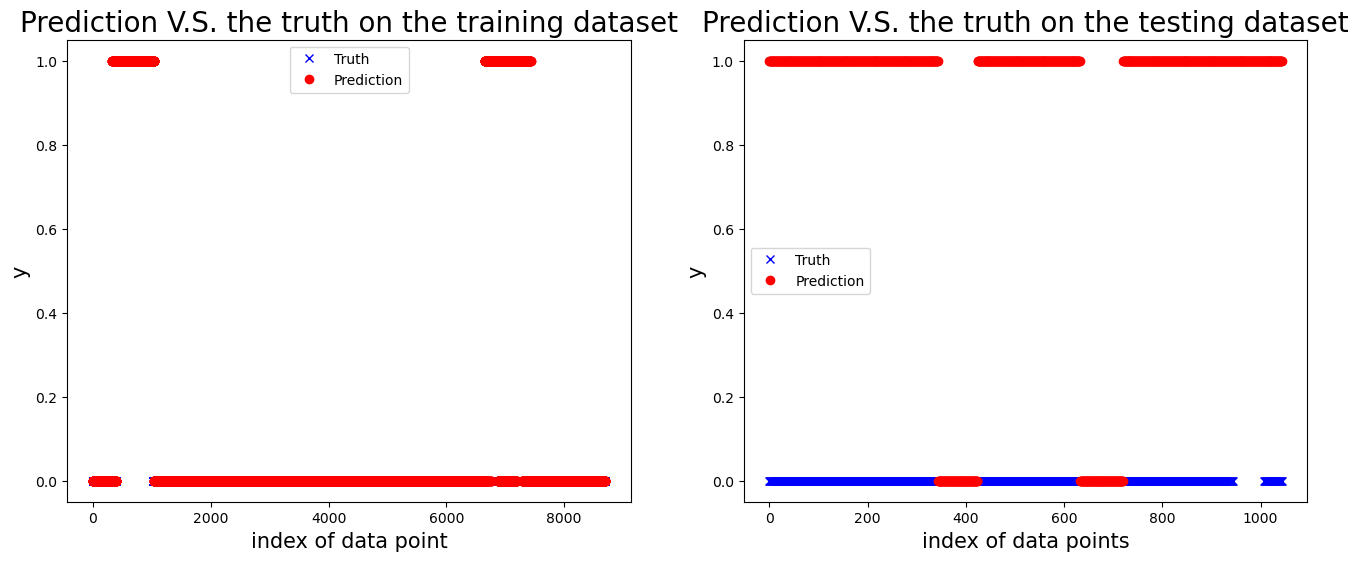


 New cv run:

Training performance, accuracy is: 0.9481560032991634
Training performance, precision is: 0.686727122835944
Training performance, recall: 0.9328107502799552
Training performance, F1: 0.7910731244064577


Prediction performance, accuracy is: 0.8591885441527446
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0


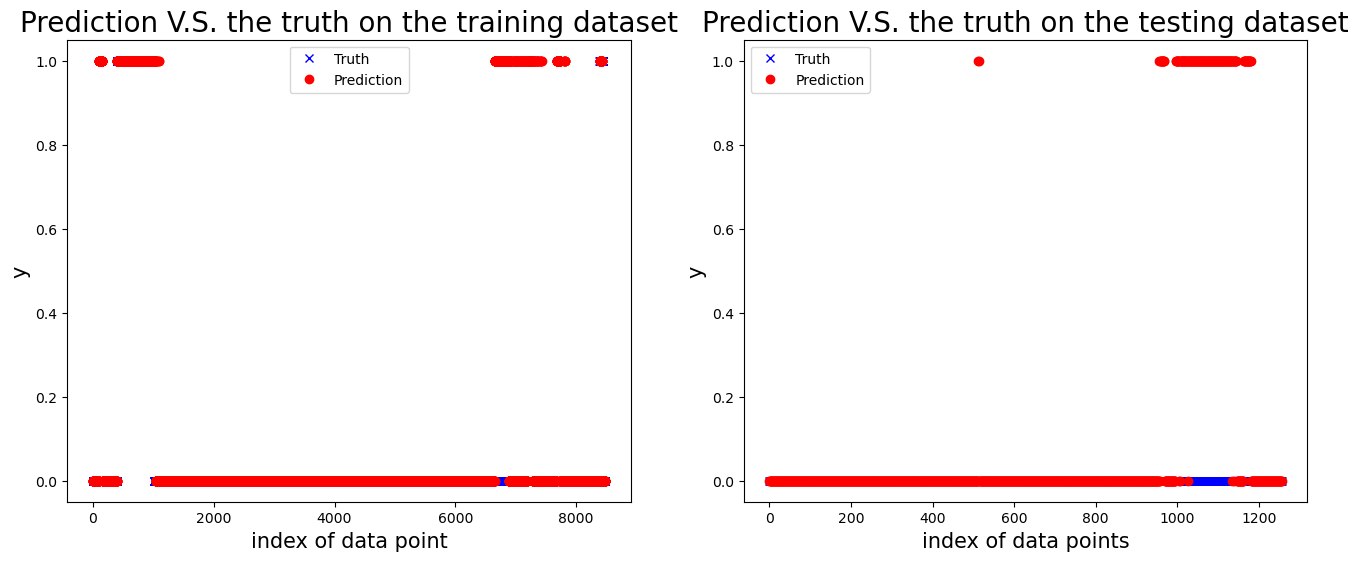

Accuracy     0.649991
Precision    0.285363
Recall       0.528682
F1 score     0.288205
dtype: float64




In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('mdl', LogisticRegression(class_weight='balanced'))    # Step 2: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)
all_results = run_all_motors(df_data, pipeline, window_size=0, single_run_result=True, mdl_type='clf')

### window size = 5

In [6]:
all_results = run_all_motors(df_data, pipeline, window_size=5, single_run_result=False, mdl_type='clf')

Model for predicting the label of motor 1:
Accuracy     0.957233
Precision    0.966165
Recall       0.730753
F1 score     0.757637
dtype: float64


Model for predicting the label of motor 2:
Accuracy     0.842655
Precision    0.797368
Recall       0.635943
F1 score     0.670302
dtype: float64


Model for predicting the label of motor 3:
Accuracy     0.991760
Precision    0.547748
Recall       0.597590
F1 score     0.569072
dtype: float64


Model for predicting the label of motor 4:
Accuracy     0.829780
Precision    0.797590
Recall       0.624552
F1 score     0.654025
dtype: float64


Model for predicting the label of motor 5:
Accuracy     0.809975
Precision    0.400000
Recall       0.400000
F1 score     0.400000
dtype: float64


Model for predicting the label of motor 6:
Accuracy     0.967775
Precision    0.833800
Recall       0.793482
F1 score     0.734308
dtype: float64




### Hyperparameter tuning

Model for predicting the label of motor 1:
New cv run:

Training performance, accuracy is: 0.9980340760157274
Training performance, precision is: 0.9322033898305084
Training performance, recall: 0.9649122807017544
Training performance, F1: 0.9482758620689654
Prediction performance, accuracy is: 0.999096657633243
Prediction performance, precision is: 0.9969088098918083
Prediction performance, recall is：0.9984520123839009
Prediction performance, F1 is：0.9976798143851509
New cv run:

Training performance, accuracy is: 0.9985221154861185
Training performance, precision is: 0.9940784603997039
Training performance, recall: 0.9955522609340252
Training performance, F1: 0.9948148148148147
Prediction performance, accuracy is: 1.0
Prediction performance, precision is: 0.0
Prediction performance, recall is：0.0
Prediction performance, F1 is：0.0
New cv run:

Training performance, accuracy is: 0.9979221347331584
Training performance, precision is: 0.9925925925925926
Training performance, recall: 0.99

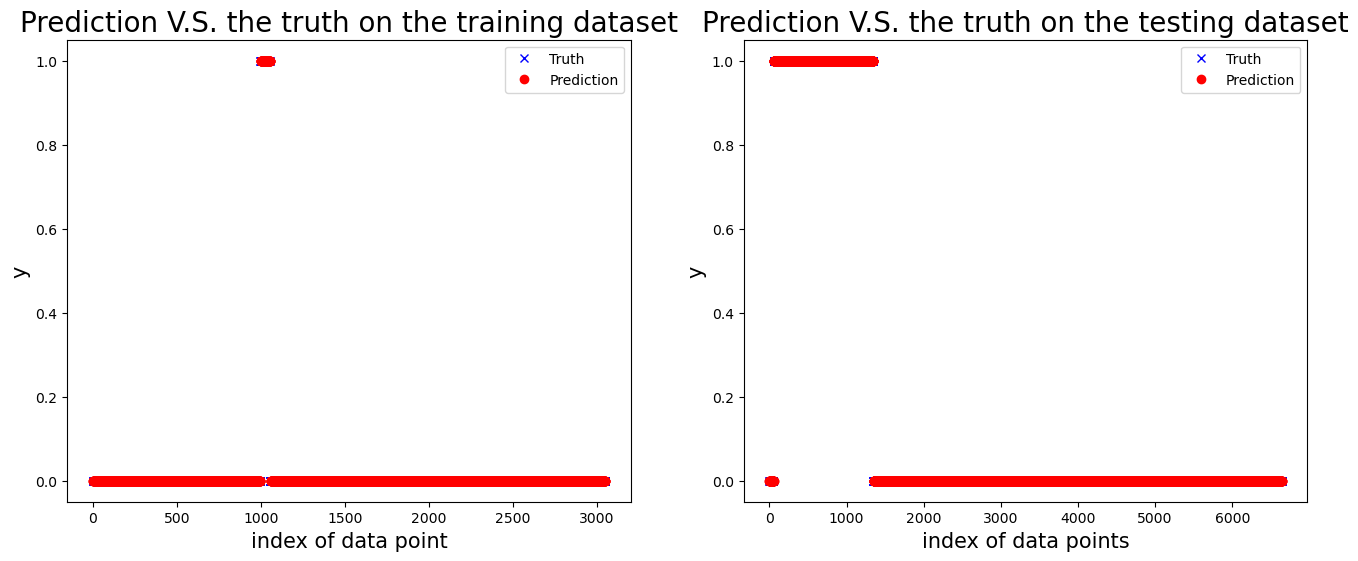

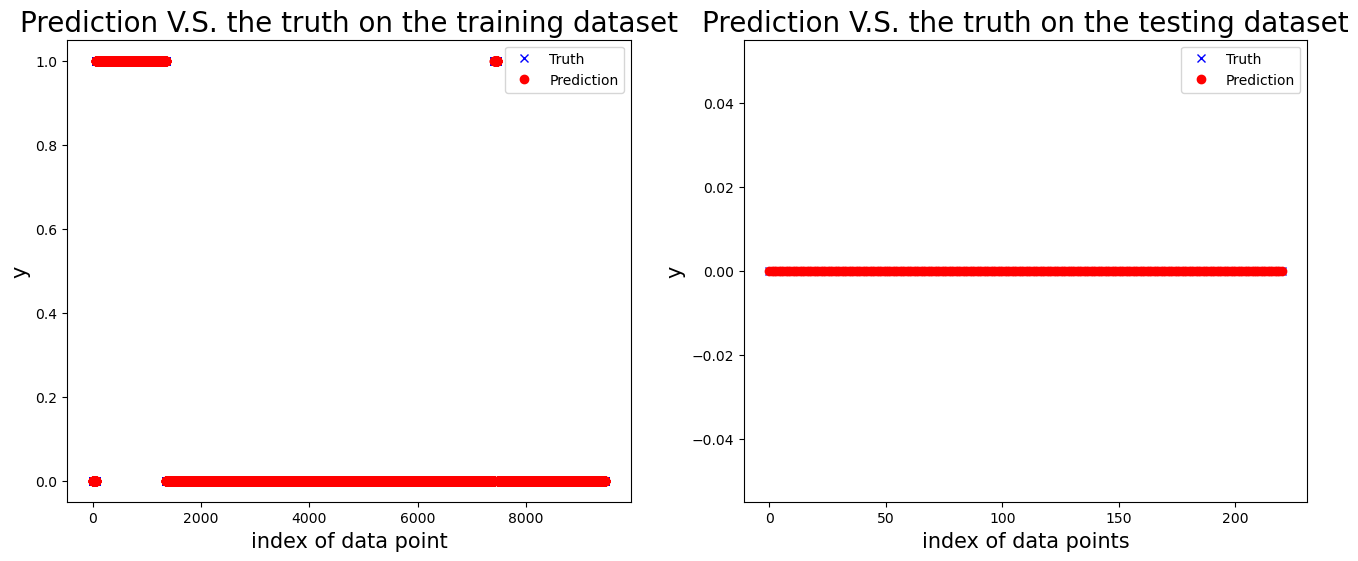

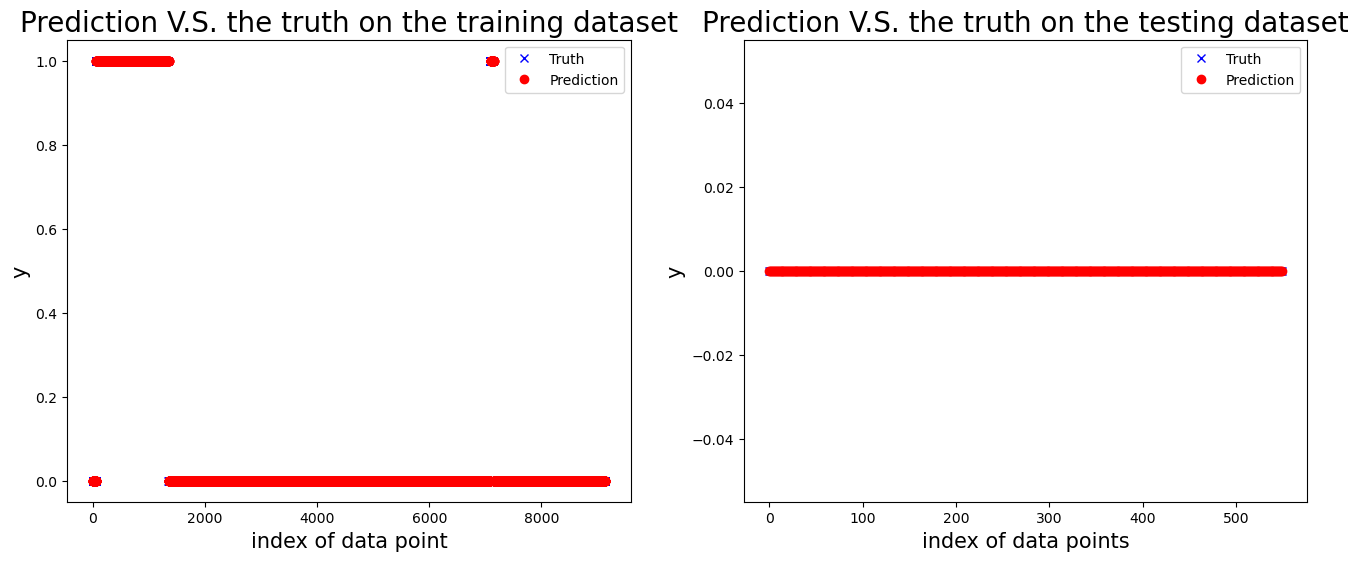

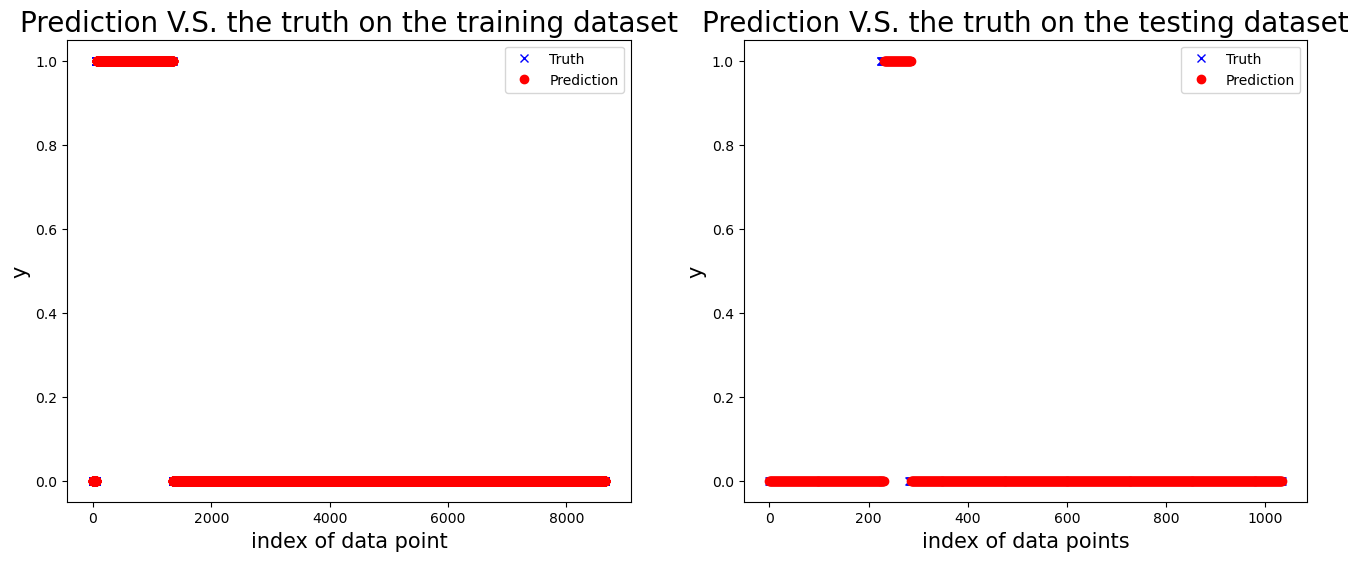

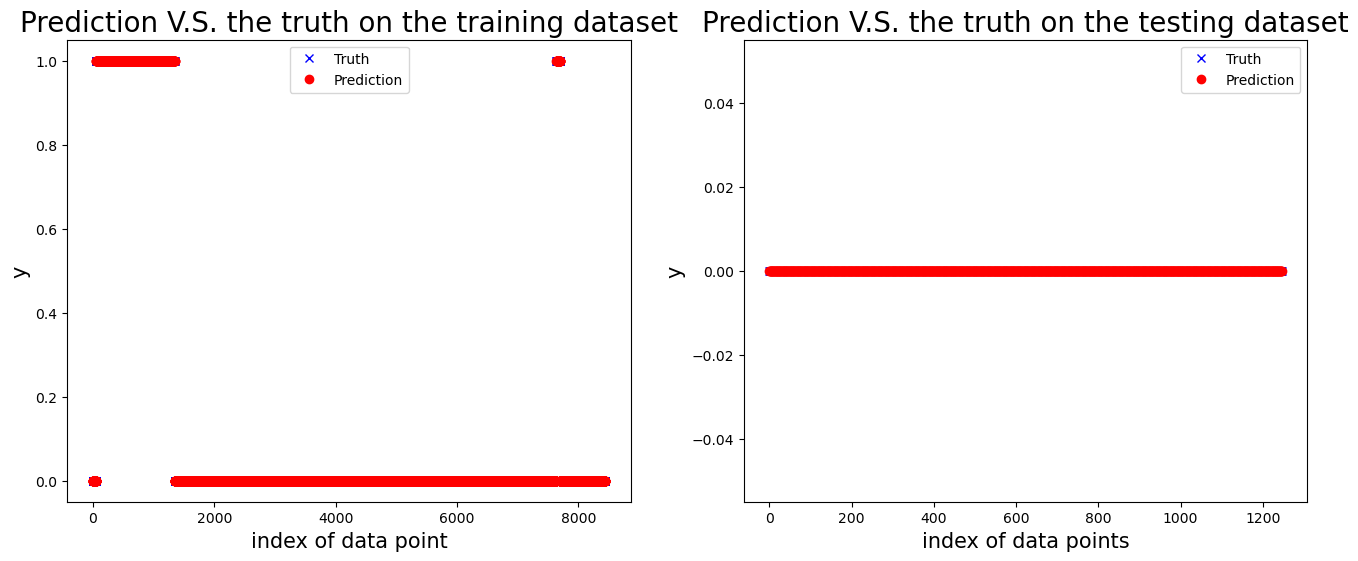

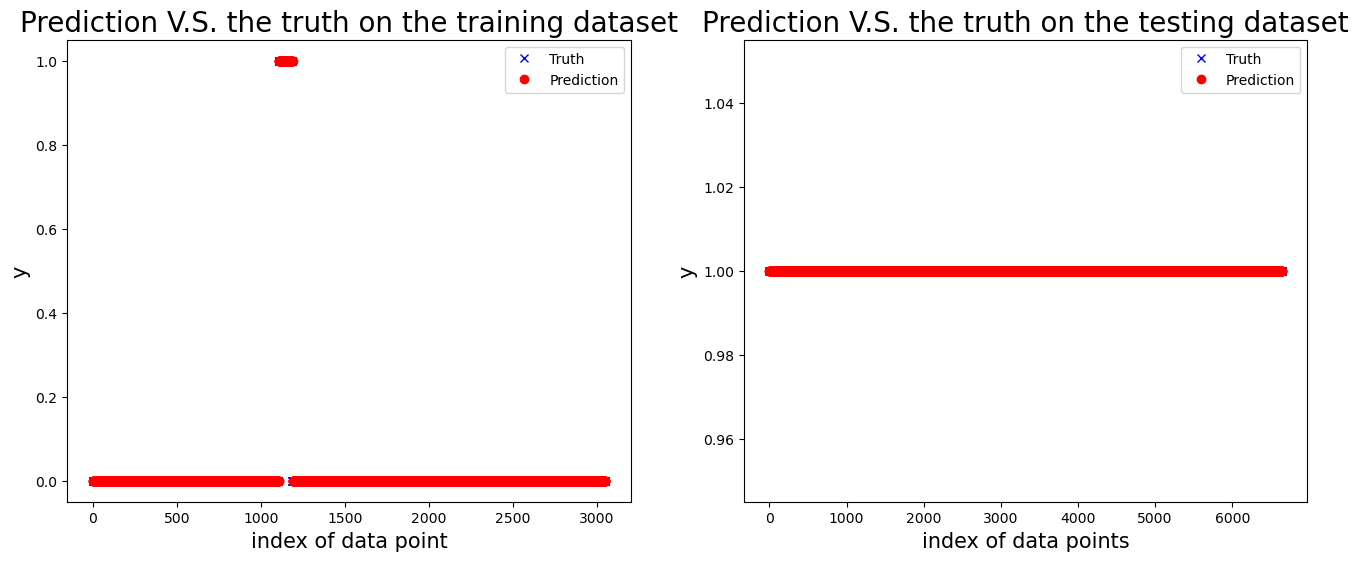

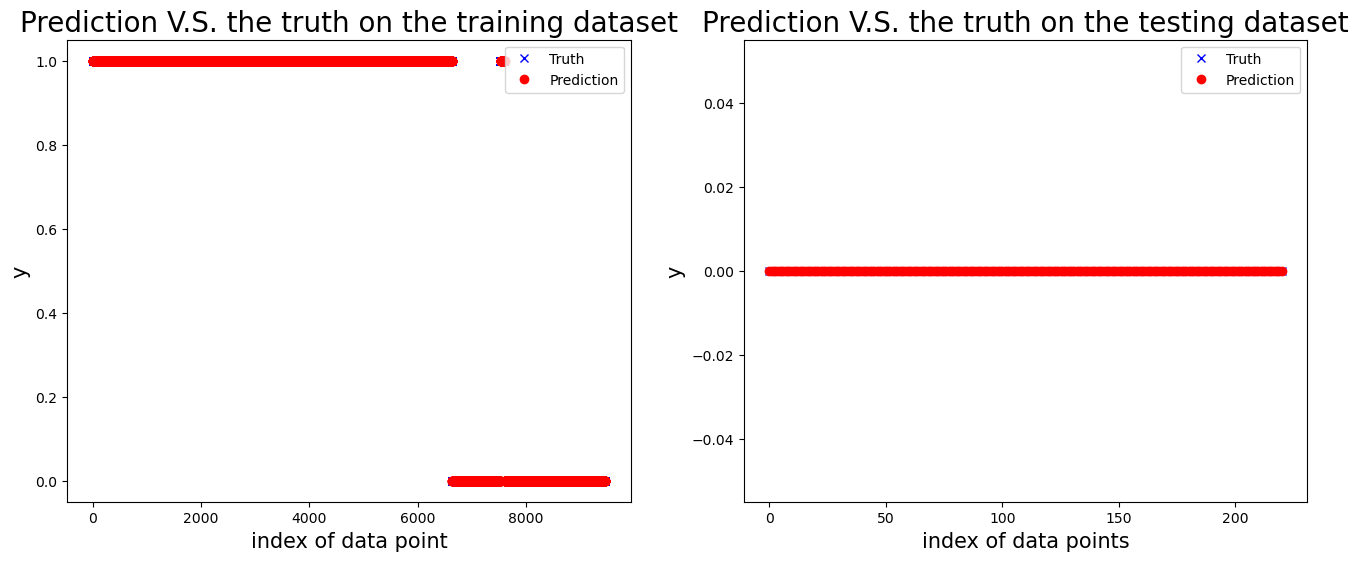

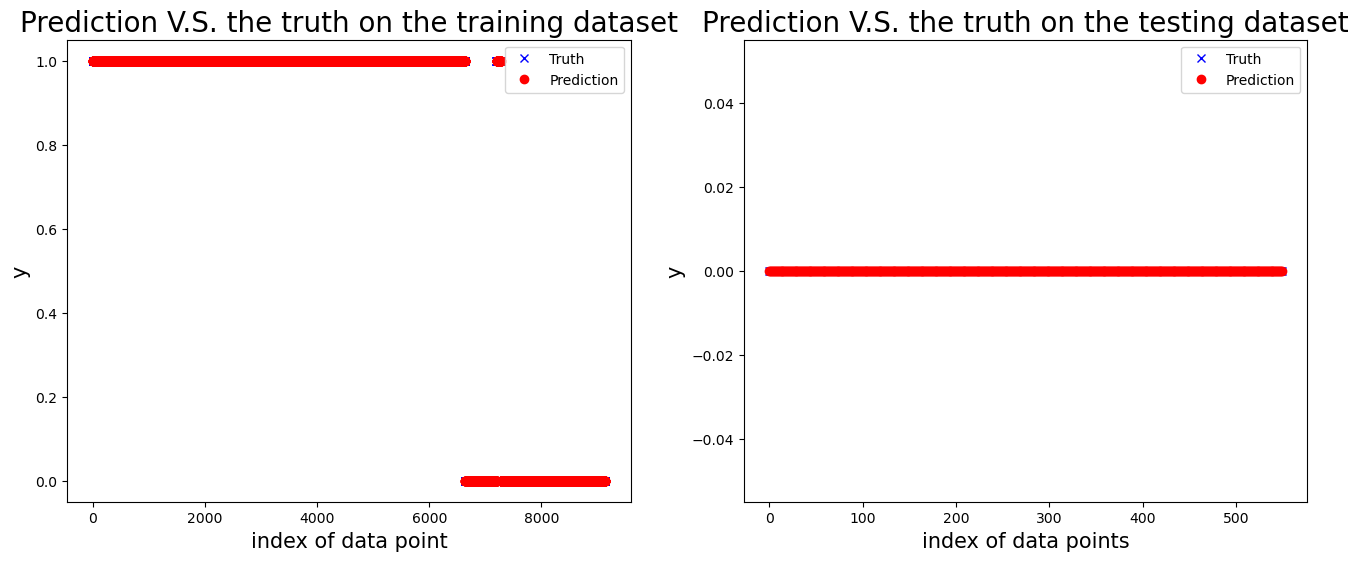

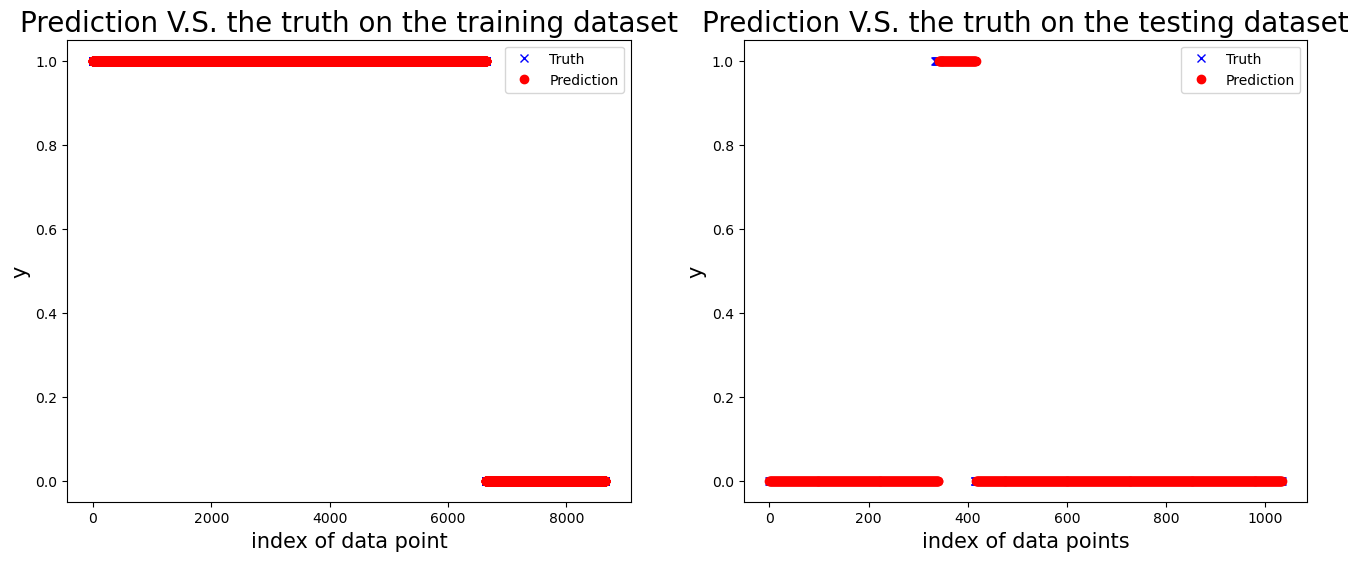

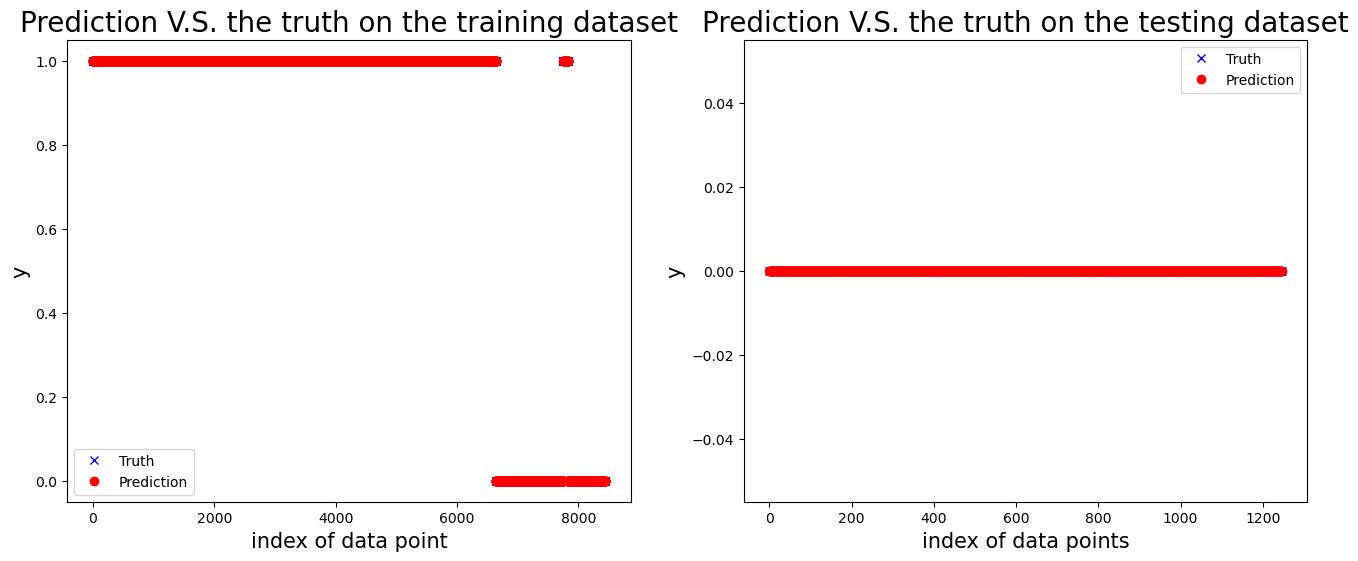

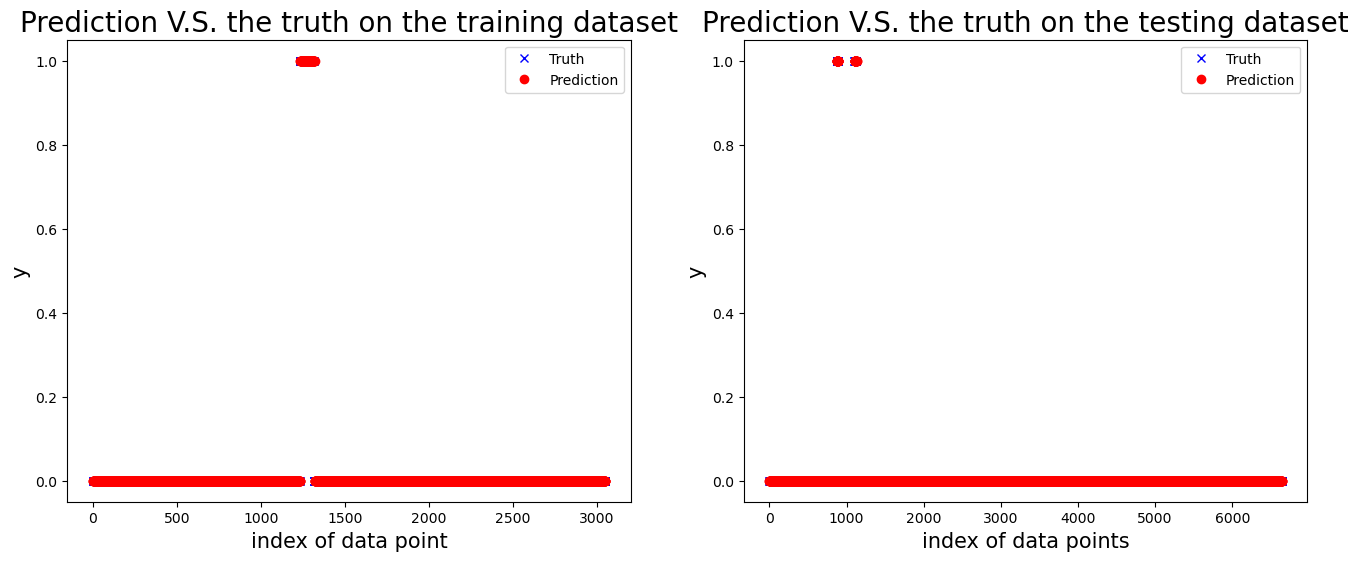

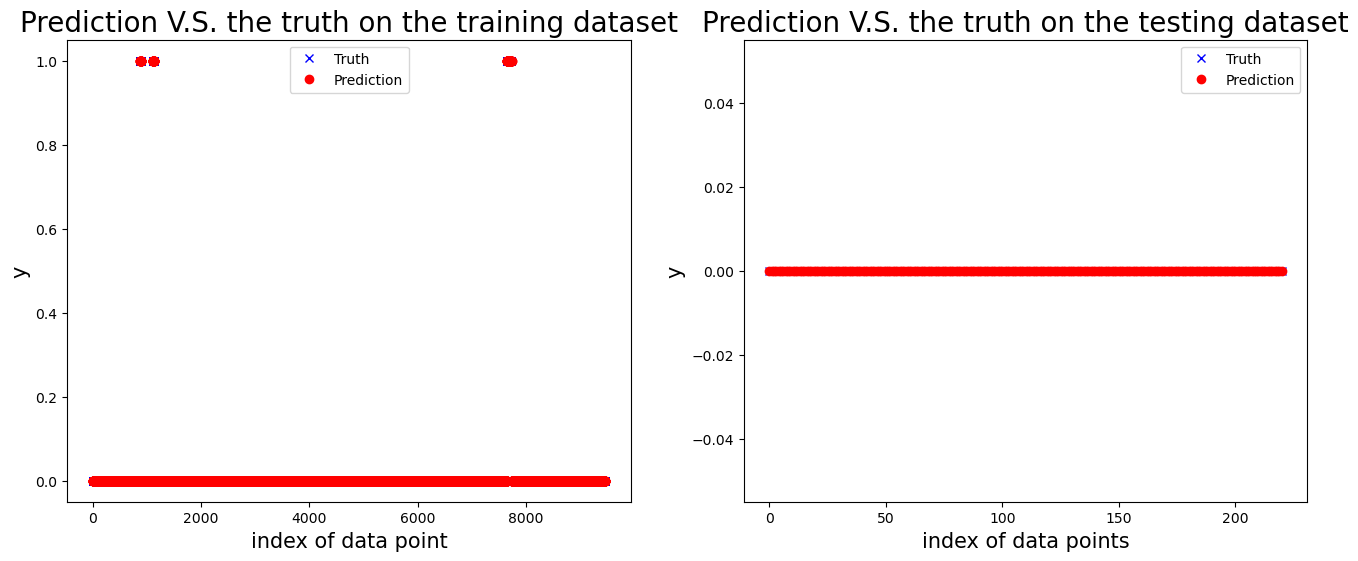

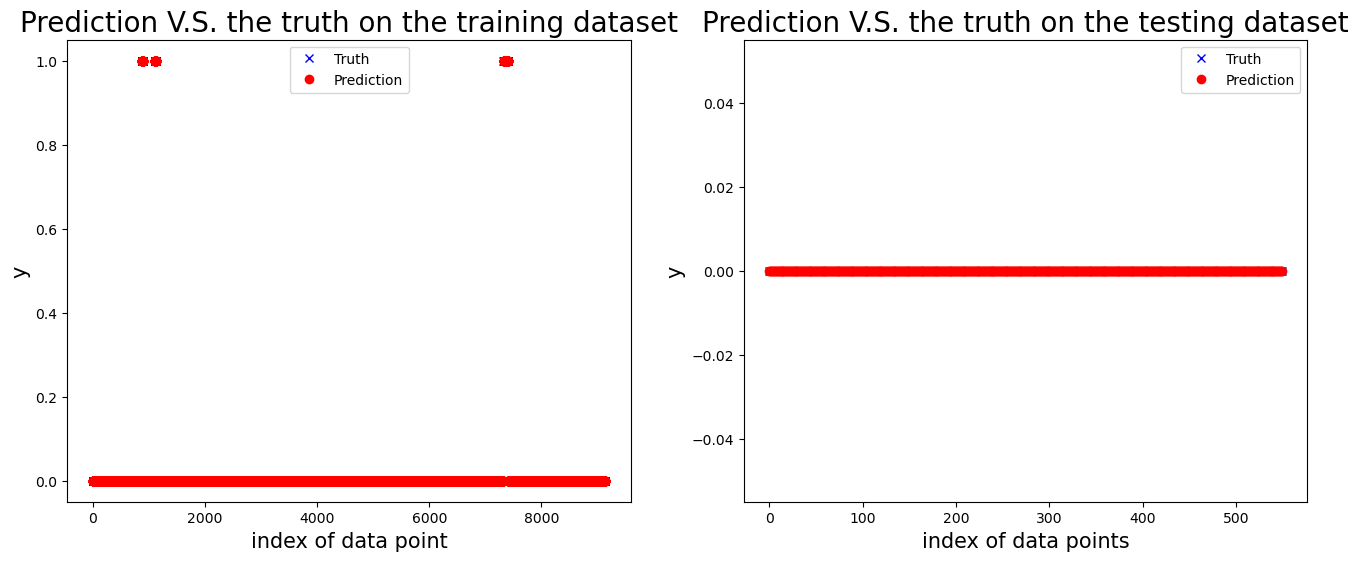

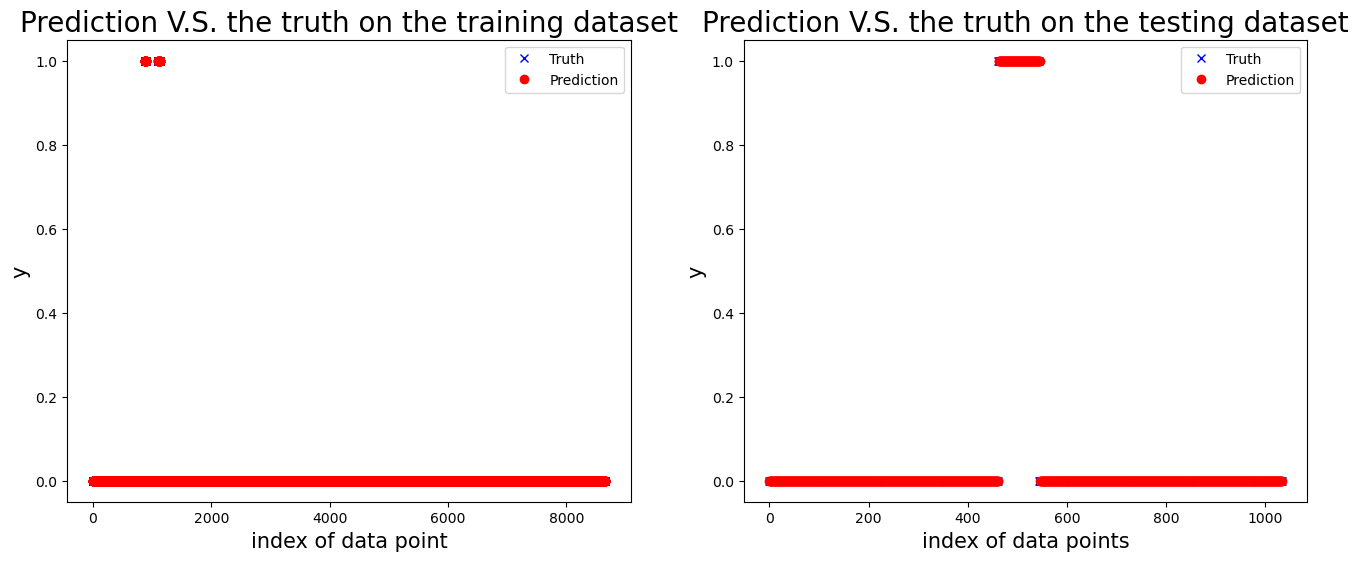

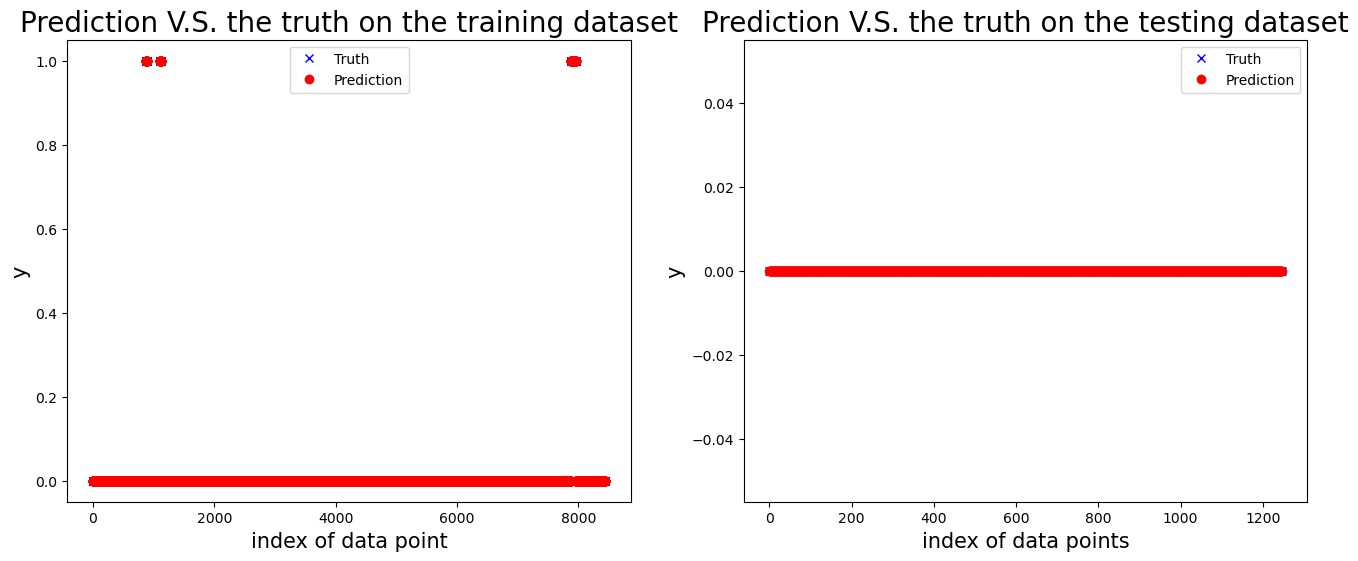

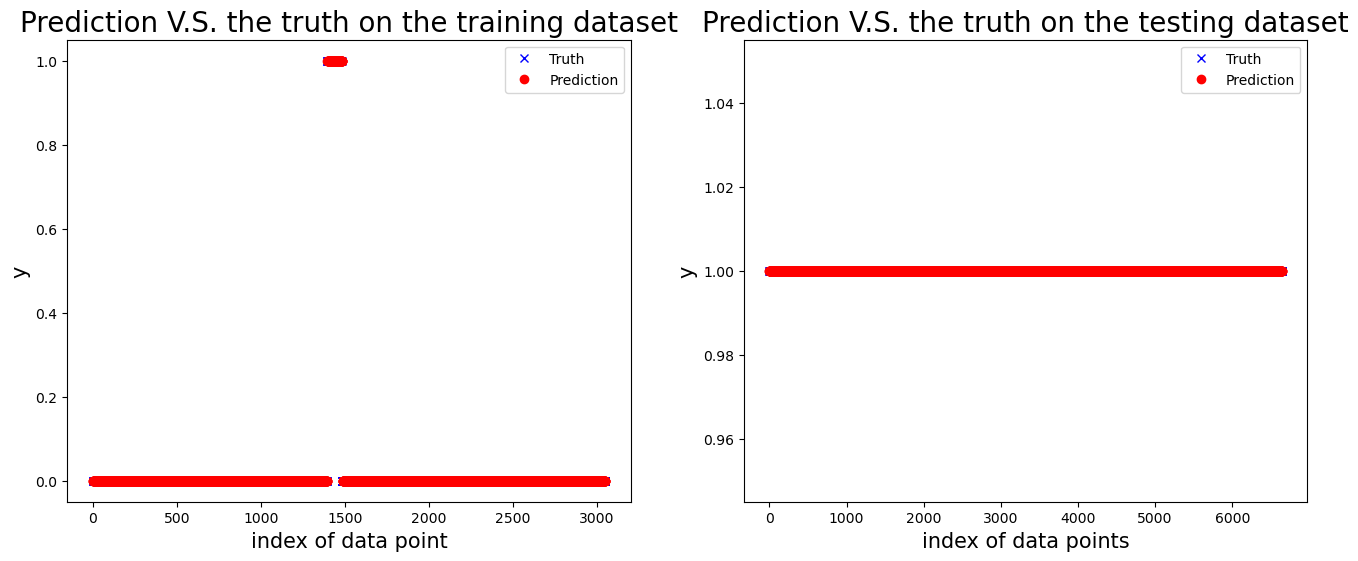

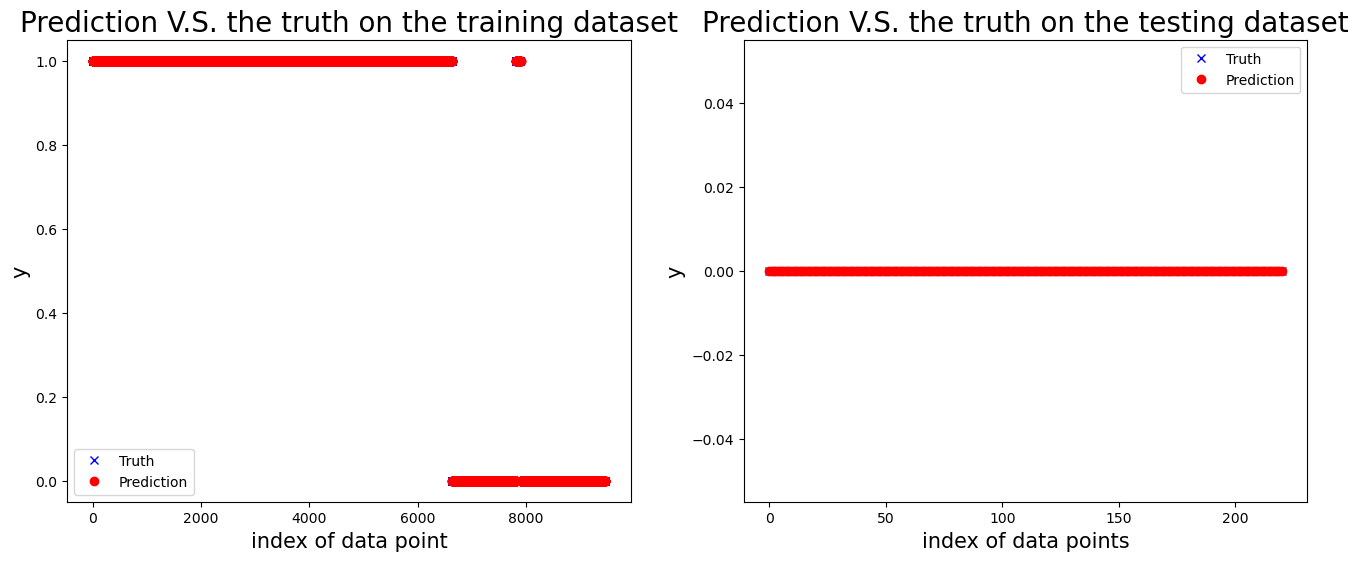

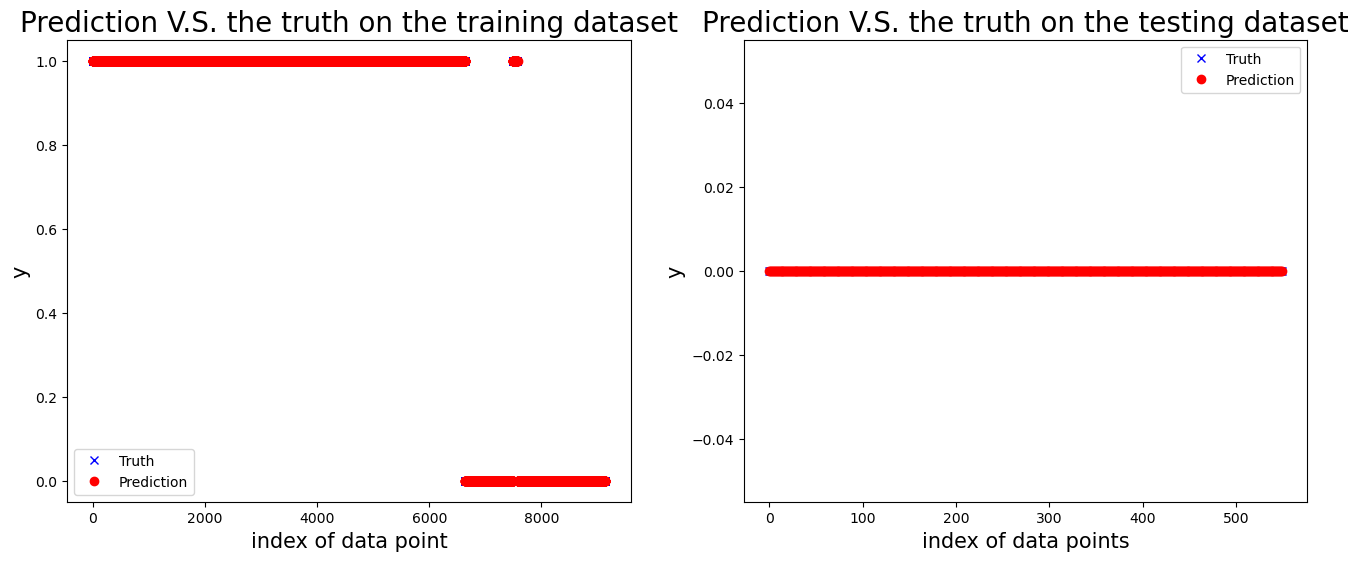

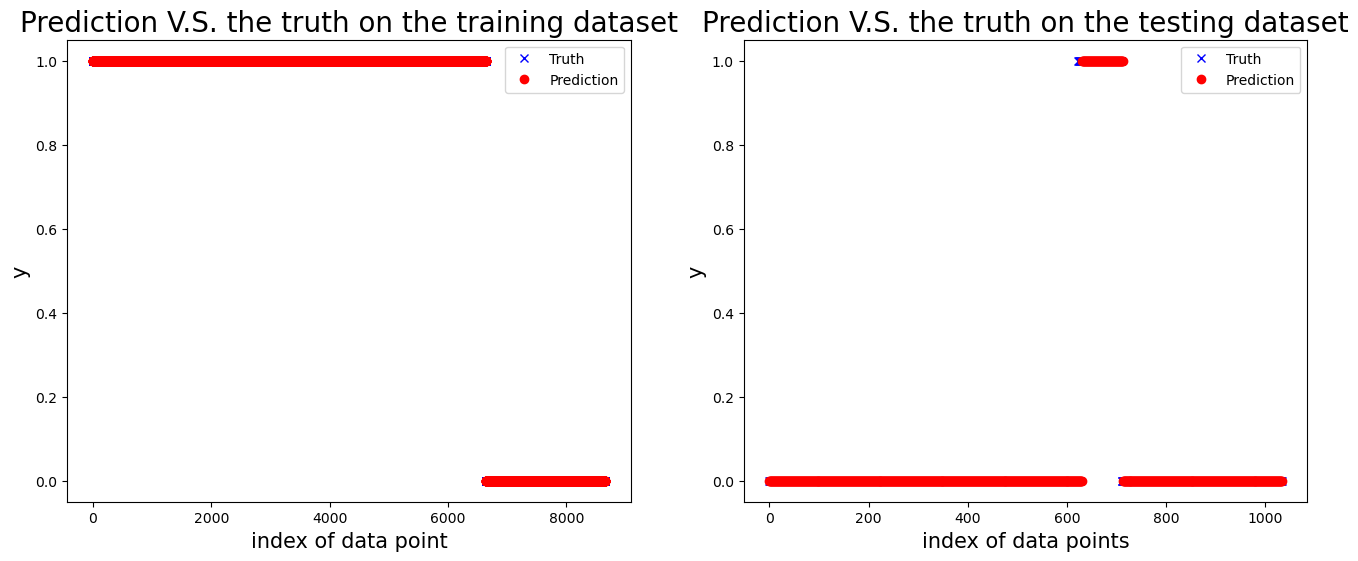

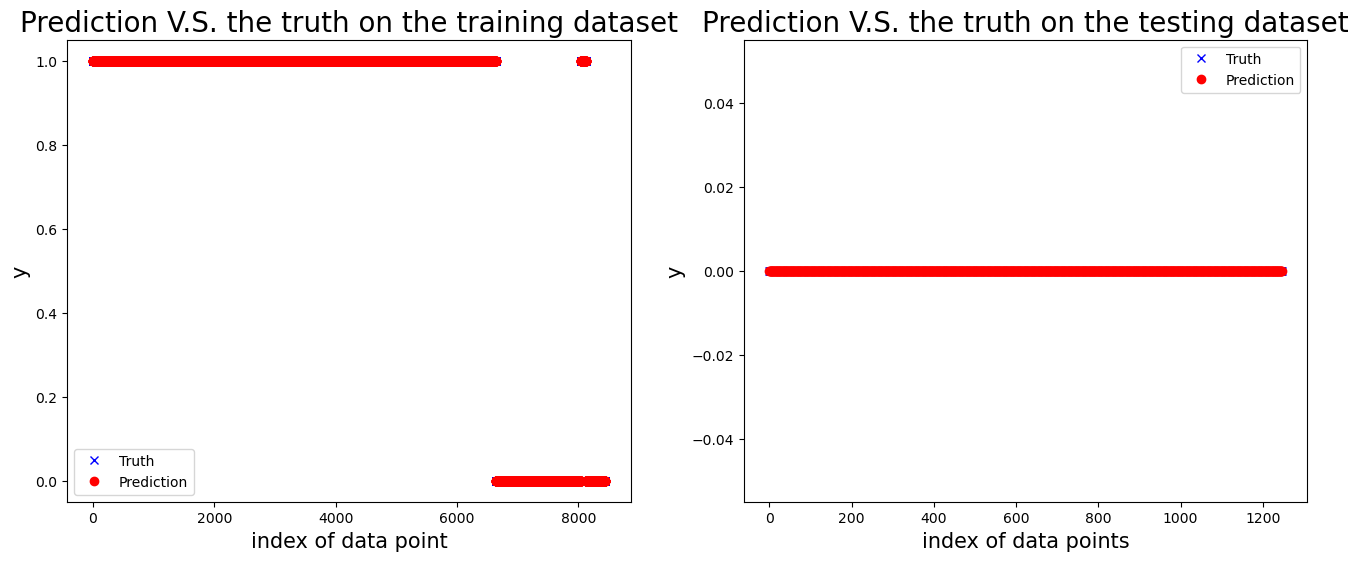

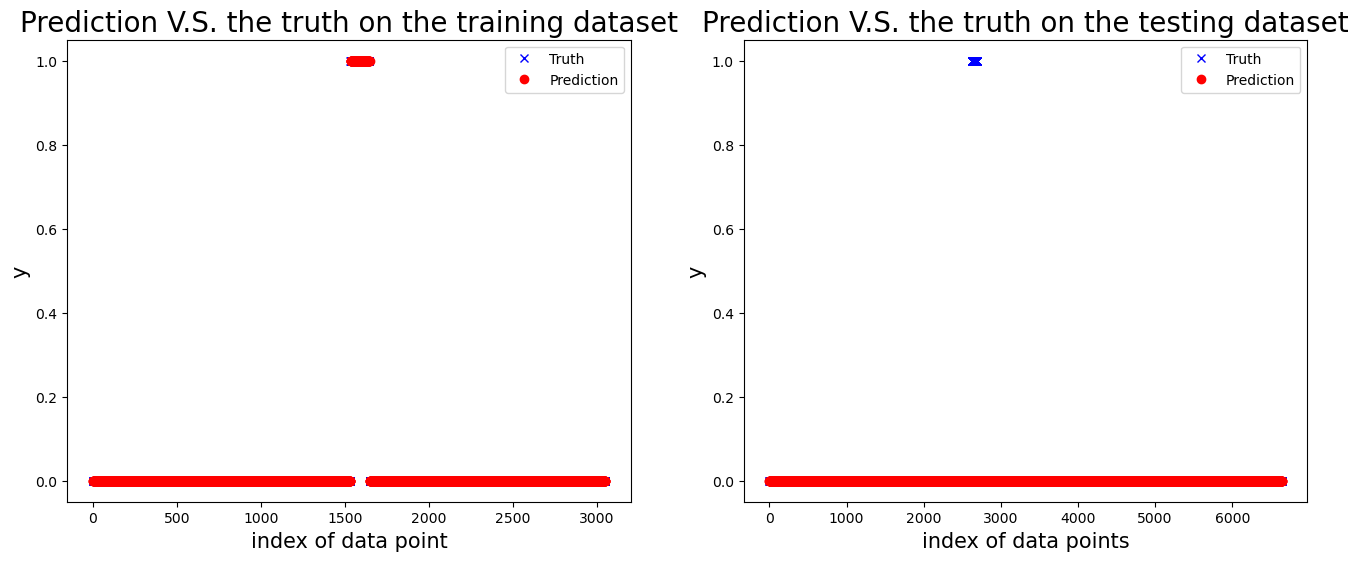

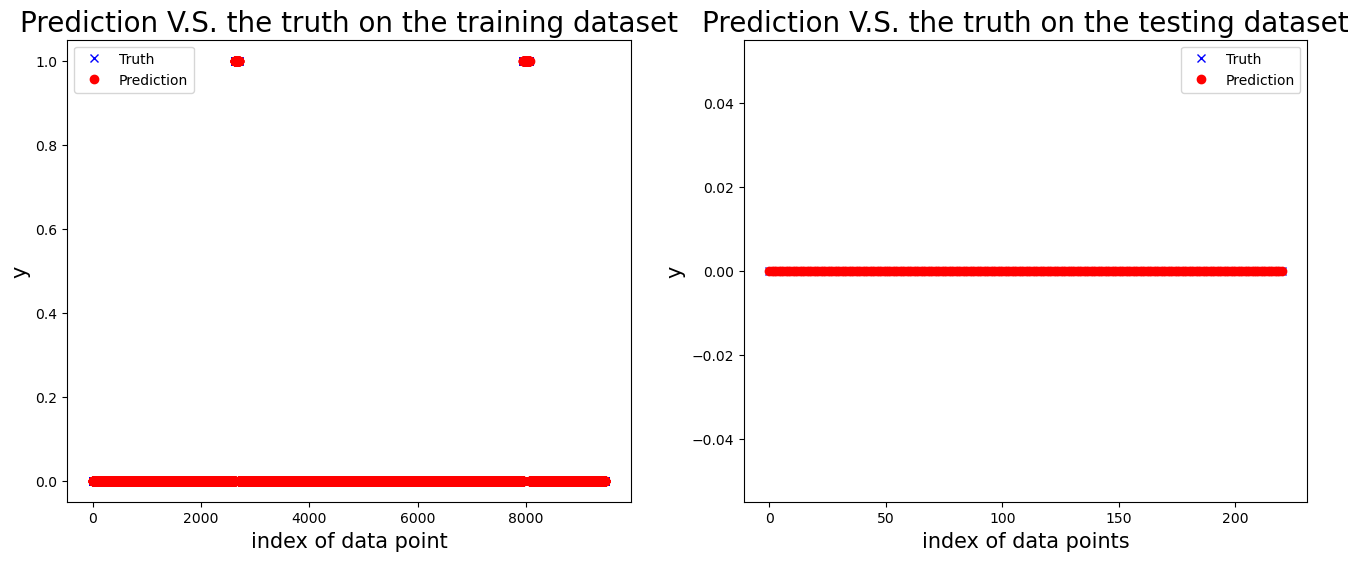

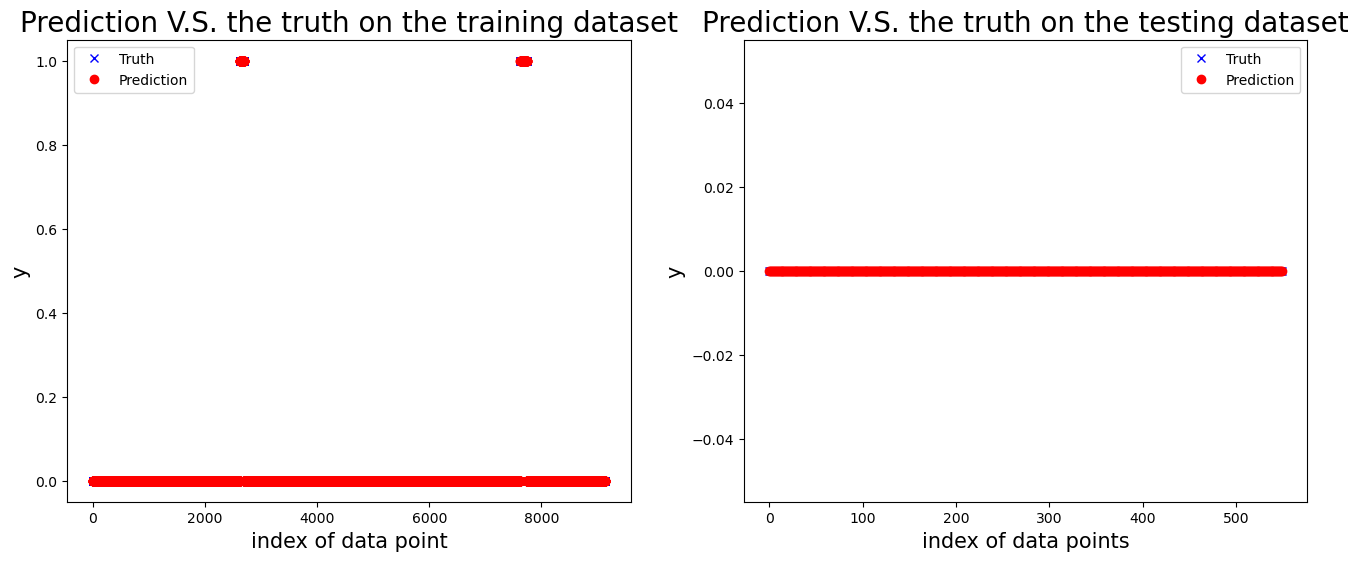

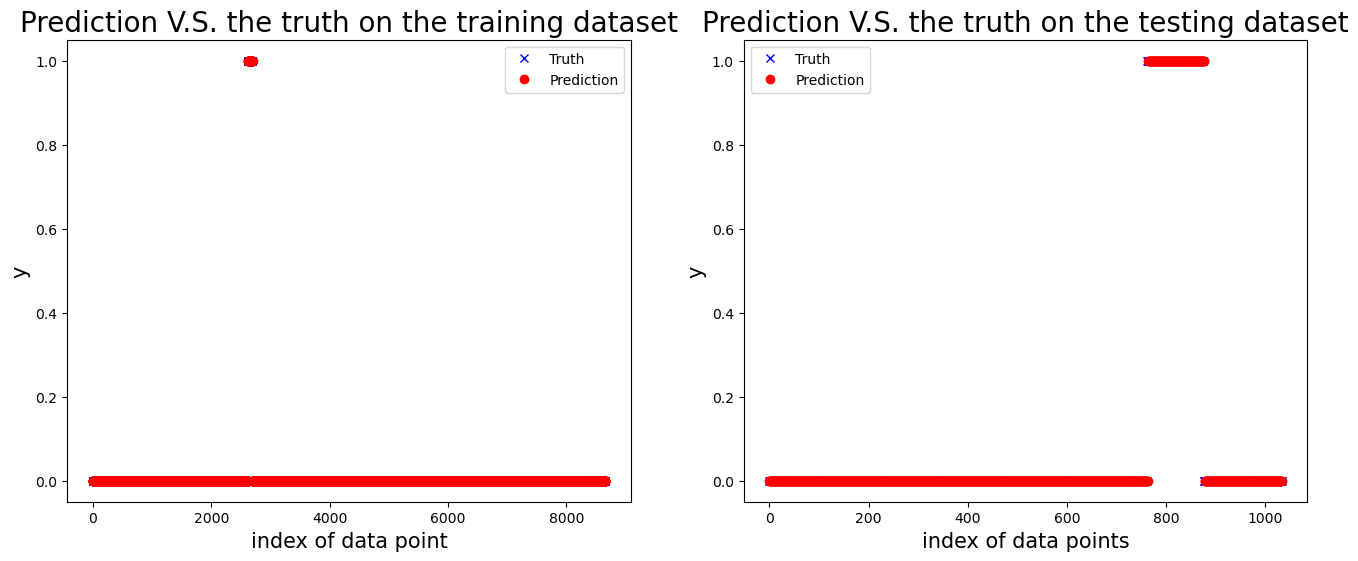

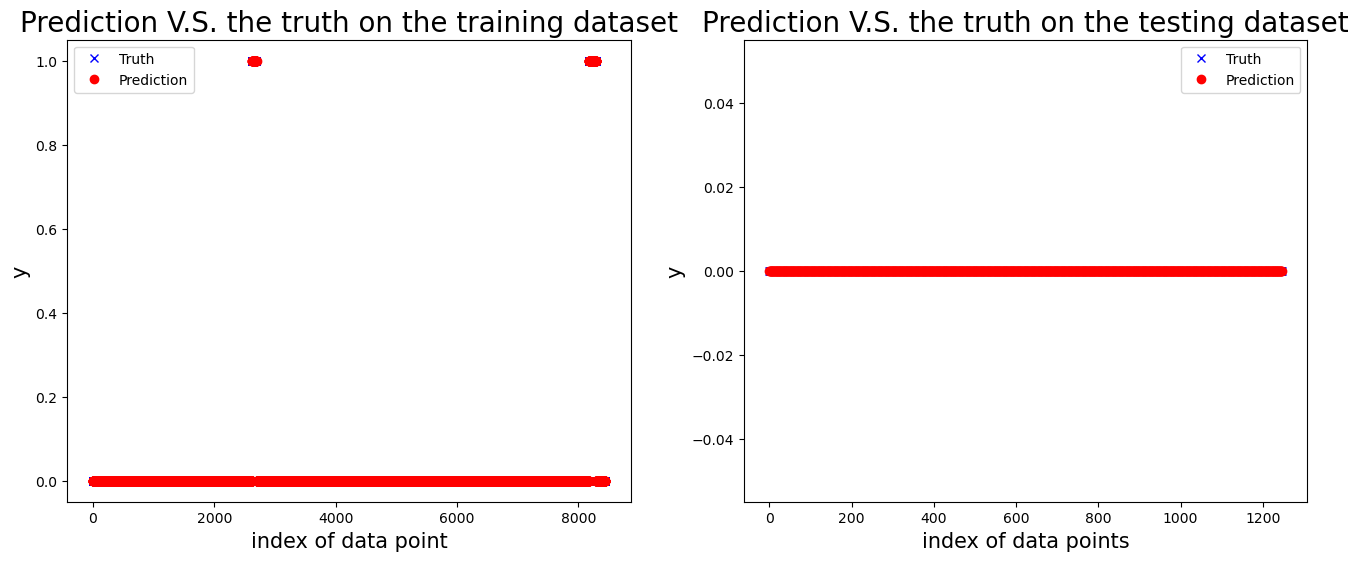

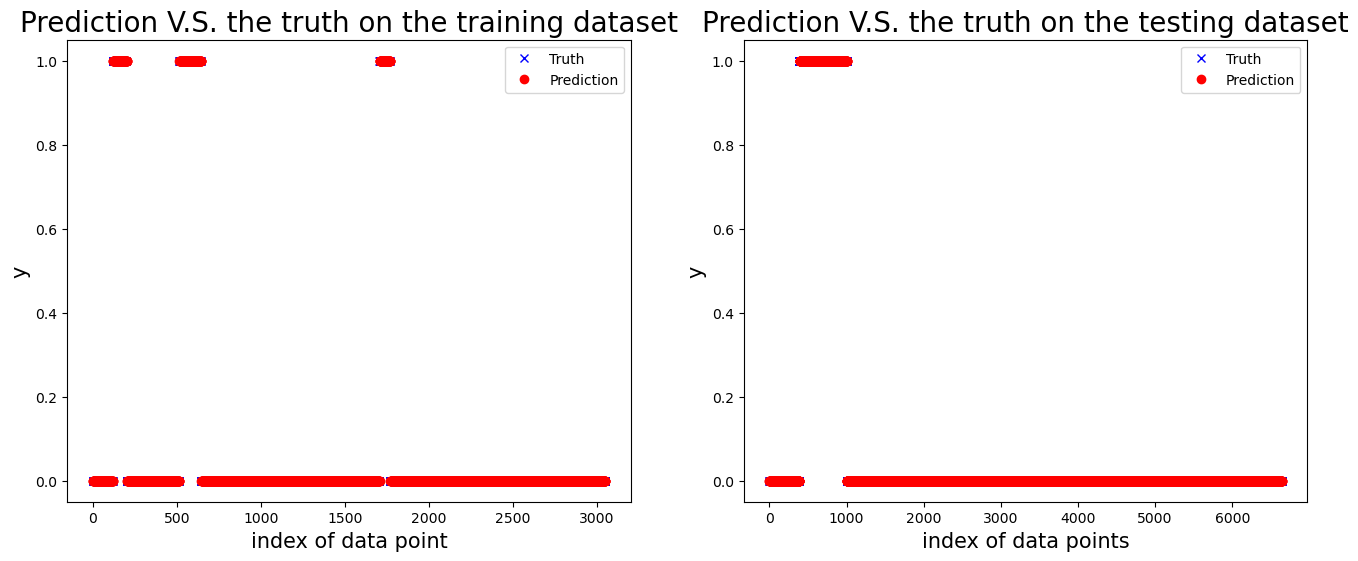

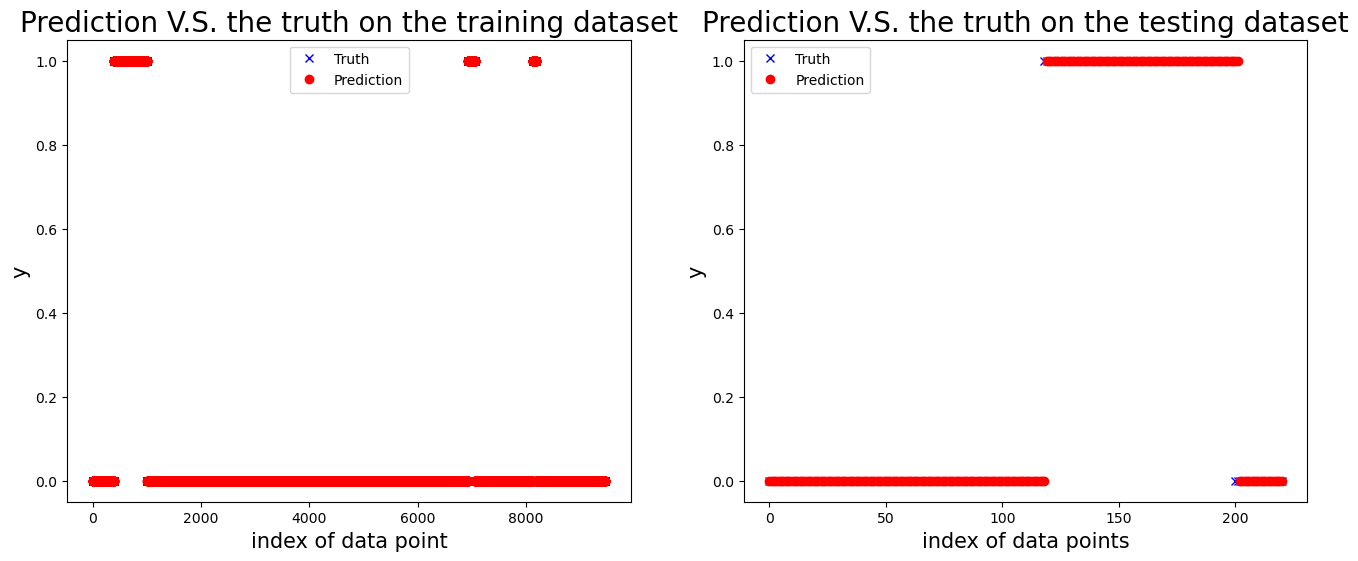

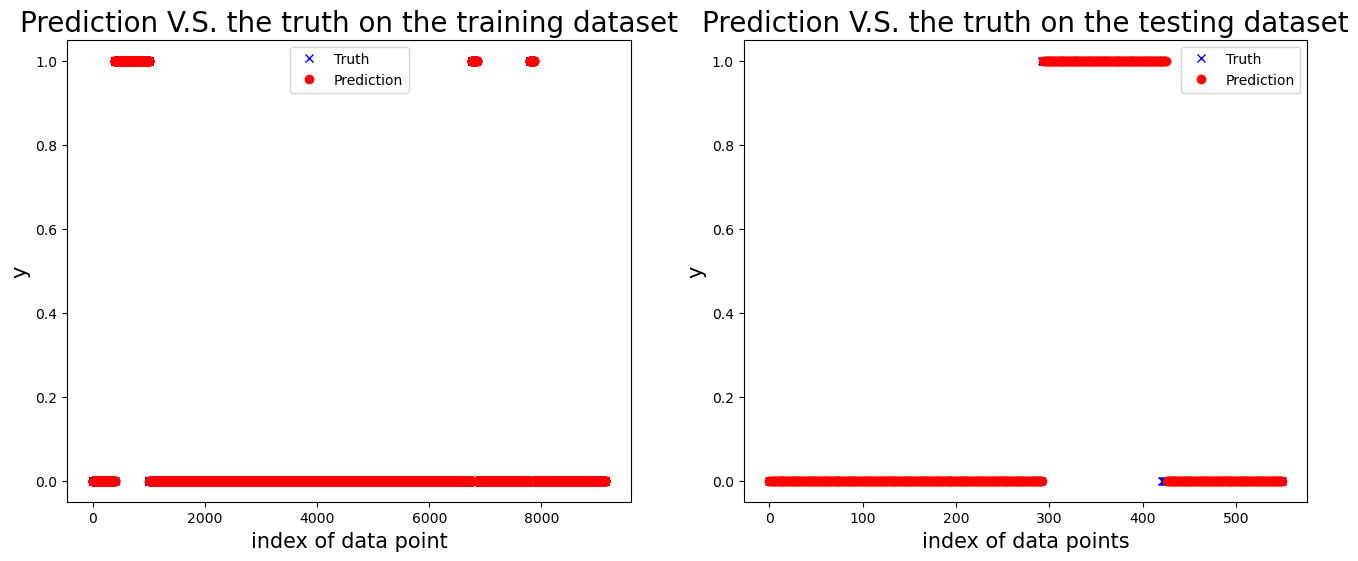

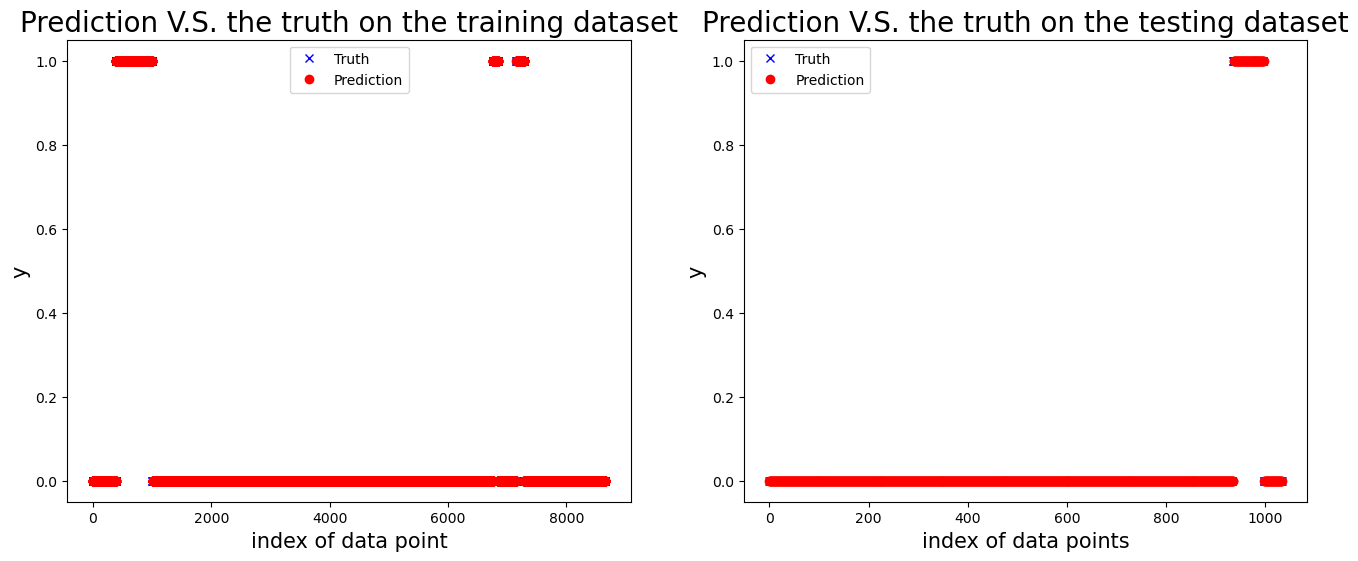

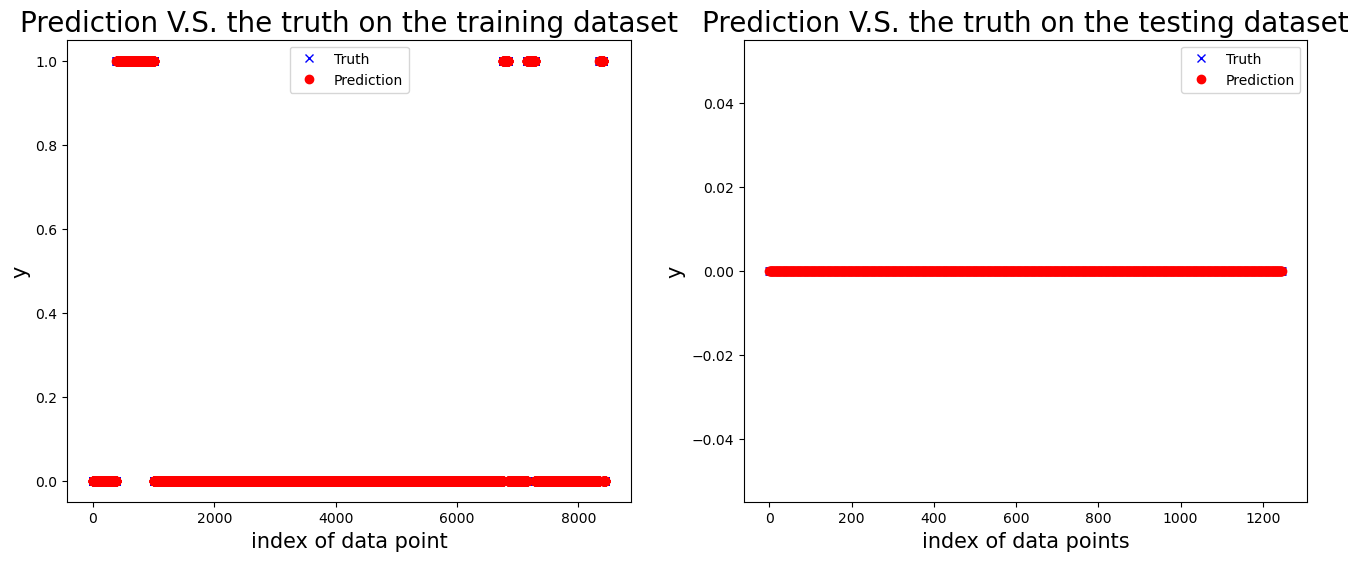

In [5]:
from sklearn.model_selection import GridSearchCV

# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('mdl', LogisticRegression(class_weight='balanced'))    # Step 2: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define hyperparameters to search
param_grid = {
    'mdl__penalty': ['l1', 'l2'],  # Regularization penalty
    'mdl__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=5)

all_results = run_all_motors(df_data, grid_search, window_size=5, single_run_result=False, mdl_type='clf')